In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the train Dataset:
- We Import the Dataset and take a quick look at 3 random rows:

In [207]:
train_df = pd.read_csv('data/train.csv')
train_df.sample(5)

Dates        Category                      Descript  \
517549  2008-01-25 20:24:00  SUSPICIOUS OCC         SUSPICIOUS OCCURRENCE   
268133  2011-09-23 10:40:00   LARCENY/THEFT   PETTY THEFT FROM A BUILDING   
575824  2007-03-22 19:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
288554  2011-06-02 14:30:00  OTHER OFFENSES           PROBATION VIOLATION   
157247  2013-04-16 14:30:00   LARCENY/THEFT       PETTY THEFT SHOPLIFTING   

       DayOfWeek  PdDistrict      Resolution                   Address  \
517549    Friday     MISSION            NONE     2600 Block of 16TH ST   
268133    Friday   INGLESIDE            NONE      0 Block of PHELAN AV   
575824  Thursday     TARAVAL            NONE  500 Block of JOHNMUIR DR   
288554  Thursday   INGLESIDE  ARREST, BOOKED    MISSION ST / SENECA AV   
157247   Tuesday  TENDERLOIN   ARREST, CITED      0 Block of POWELL ST   

                 X          Y  
517549 -122.412773  37.765523  
268133 -122.452290  37.725693  
575824 -122.492068  37.714362  
288554 -122.440106  37.717666  
157247 -122.407845  37.785094

- Next we check the columns and their types:

In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


Observations:
- The Dataset contains 878049 Observations of 9 Features
- the 'Dates' column is a String ( also it's plural >_> )
- We have Categorical Features: Category, DayOfWeek, PdDistrict, Resolution
- We have Geospatial Information: 'X' (Longitude) and 'Y' (Latitude)
- The 'Address' Column has some kind of structure

## The 'Dates' Column:

### Data Cleaning & Feature Engineering:

#### Check for missing values

In [209]:
train_df.Dates.isnull().any()

False

#### Check for typos by making sure that all values match a Regular Expression

In [210]:
train_df.Dates.str.match('\d\d\d\d-\d\d-\d\d').all()

True

#### First, let's rename the Column (all column names are singular except this one!)

In [211]:
train_df.rename(columns={'Dates': 'DateTime'}, inplace=True)
train_df.columns

Index(['DateTime', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

#### Now Let's parse the dates from String to Datetime

In [212]:
train_df.DateTime = pd.to_datetime(train_df.DateTime)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


#### Create separate columns for 'Year', 'Month', 'Hour'

In [213]:
train_df['Year'] = train_df.DateTime.dt.year
train_df['Year'].sample(3)

77221     2014
644535    2006
474072    2008
Name: Year, dtype: int64

In [214]:
train_df['Month'] = train_df.DateTime.dt.month
train_df['Month'].sample(3)

147619     5
469358    10
34351     11
Name: Month, dtype: int64

In [215]:
train_df['Hour'] = train_df.DateTime.dt.hour
train_df['Hour'].sample(3)

772621    11
313019     0
623495    20
Name: Hour, dtype: int64

In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   Year        878049 non-null  int64         
 10  Month       878049 non-null  int64         
 11  Hour        878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 80.4+ MB


#### Let's Check the range of Dates:

In [217]:
train_df.DateTime.min(), train_df.DateTime.max()

(Timestamp('2003-01-06 00:01:00'), Timestamp('2015-05-13 23:53:00'))

#### Encoding Month, DayOfWeek & Hour

In [218]:
train_df['MonthSin'] = np.sin((train_df.Month*2*np.pi)/12)
train_df['MonthCos'] = np.cos((train_df.Month*2*np.pi)/12)

In [219]:
train_df['DayOfWeekInt'] = train_df.DayOfWeek.map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})

train_df['DayOfWeekSin'] = np.sin((train_df.DayOfWeekInt*2*np.pi)/7)
train_df['DayOfWeekCos'] = np.cos((train_df.DayOfWeekInt*2*np.pi)/7)

In [220]:
train_df['HourSin'] = np.sin((train_df.Hour*2*np.pi)/24)
train_df['HourCos'] = np.cos((train_df.Hour*2*np.pi)/24)

In [221]:
train_df.sample(7)

DateTime           Category  \
563694 2007-05-30 07:00:00          VANDALISM   
567321 2007-05-06 08:53:00       NON-CRIMINAL   
485113 2008-07-12 13:15:00  RECOVERED VEHICLE   
762356 2004-07-20 15:48:00            ASSAULT   
14921  2015-03-03 21:00:00      LARCENY/THEFT   
474196 2008-09-06 15:50:00     OTHER OFFENSES   
775323 2004-05-14 23:30:00         KIDNAPPING   

                                     Descript  DayOfWeek PdDistrict  \
563694           MALICIOUS MISCHIEF, GRAFFITI  Wednesday  INGLESIDE   
567321                             AIDED CASE     Sunday   NORTHERN   
485113  RECOVERED VEHICLE - STOLEN OUTSIDE SF   Saturday    MISSION   
762356                                BATTERY    Tuesday   SOUTHERN   
14921                 PETTY THEFT OF PROPERTY    Tuesday    TARAVAL   
474196                      TRAFFIC VIOLATION   Saturday    MISSION   
775323               KIDNAPPING, ADULT VICTIM     Friday    CENTRAL   

            Resolution                  Address           X          Y  Year  \
563694            NONE  3200 Block of FOLSOM ST -122.413385  37.745962  2007   
567321            NONE    1700 Block of BUSH ST -122.426077  37.788019  2007   
485113            NONE  2700 Block of BRYANT ST -122.408969  37.750381  2008   
762356            NONE   800 Block of BRYANT ST -122.403405  37.775421  2004   
14921             NONE   0 Block of GRIJALVA DR -122.478605  37.716886  2015   
474196   ARREST, CITED      FOLSOM ST / 20TH ST -122.414693  37.758896  2008   
775323  ARREST, BOOKED    800 Block of GEARY ST -122.417295  37.786258  2004   

        Month  Hour  MonthSin      MonthCos  DayOfWeekInt  DayOfWeekSin  \
563694      5     7       0.5 -8.660254e-01             3  4.338837e-01   
567321      5     8       0.5 -8.660254e-01             7 -2.449294e-16   
485113      7    13      -0.5 -8.660254e-01             6 -7.818315e-01   
762356      7    15      -0.5 -8.660254e-01             2  9.749279e-01   
14921       3    21       1.0  6.123234e-17             2  9.749279e-01   
474196      9    15      -1.0 -1.836970e-16             6 -7.818315e-01   
775323      5    23       0.5 -8.660254e-01             5 -9.749279e-01   

        DayOfWeekCos   HourSin   HourCos  
563694     -0.900969  0.965926 -0.258819  
567321      1.000000  0.866025 -0.500000  
485113      0.623490 -0.258819 -0.965926  
762356     -0.222521 -0.707107 -0.707107  
14921      -0.222521 -0.707107  0.707107  
474196      0.623490 -0.707107 -0.707107  
775323     -0.222521 -0.258819  0.965926

## Crimes per Year visualization:

In [222]:
gb = train_df.groupby('Year')['Descript'].count()
gb

Year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Descript, dtype: int64

Text(0, 0.5, 'Count of Crimes')

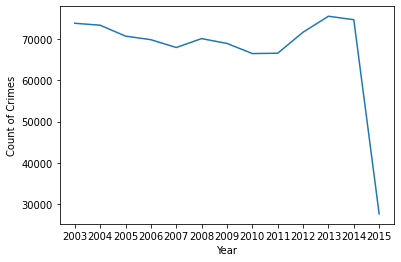

In [223]:
ax = gb.plot(kind='line', xticks=gb.index.values)
ax.set_ylabel('Count of Crimes')

#### We can see that Number of crimes in the last year (2015) is significantly lower, most probably because the data was collected before the year ended ( we'll check that later )

## Crimes per Day Of Week visualization:

#### Let's Check how many crimes are commited in each day

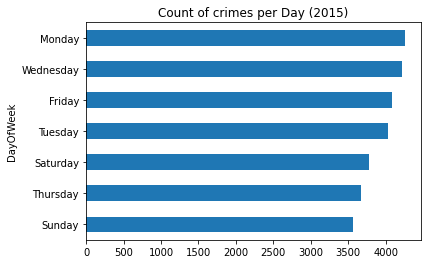

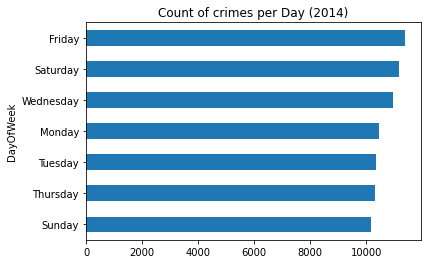

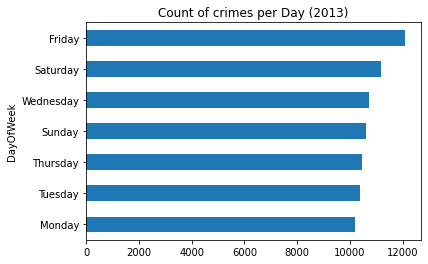

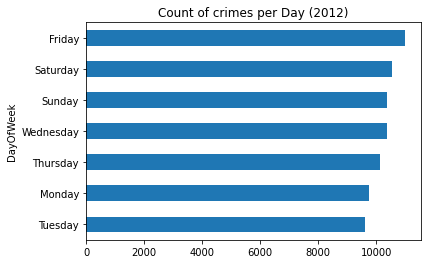

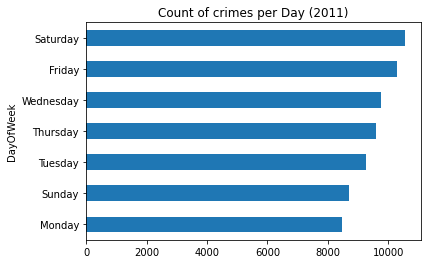

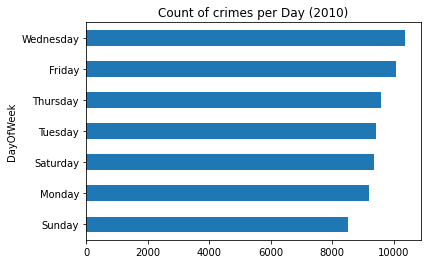

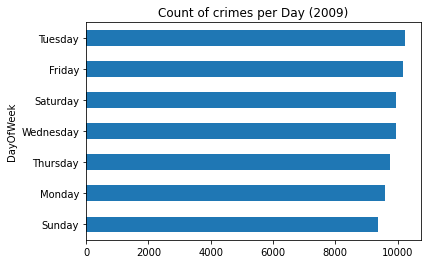

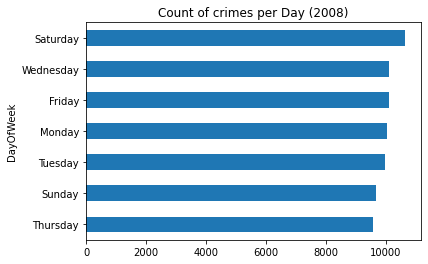

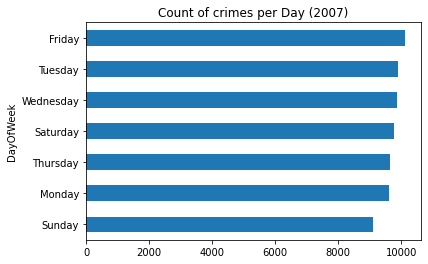

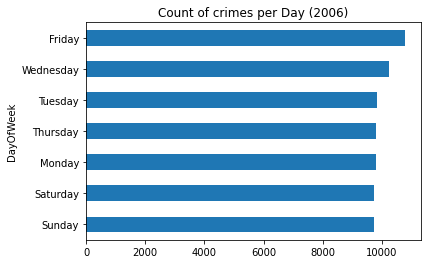

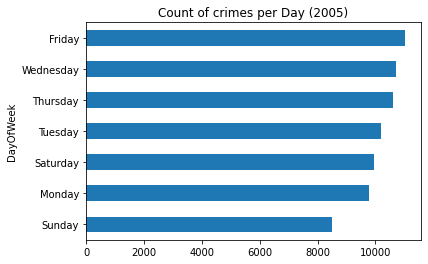

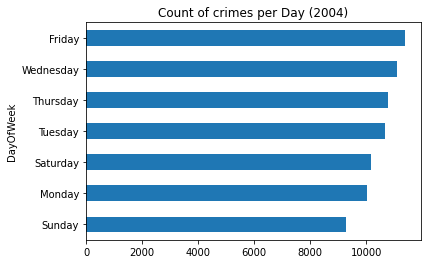

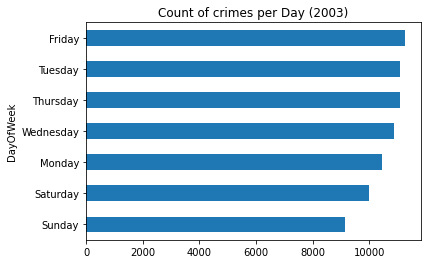

In [224]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('DayOfWeek')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

#### We notice that Friday almost always takes the top place.

## Crimes per Month visualization:

#### Let's Check if there are any patterns regarding the months :

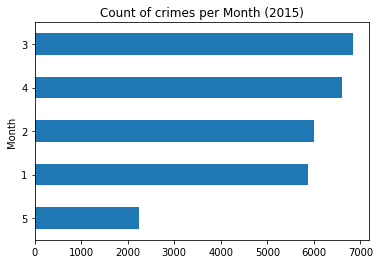

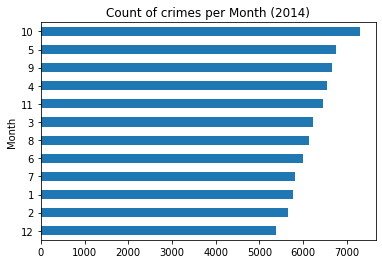

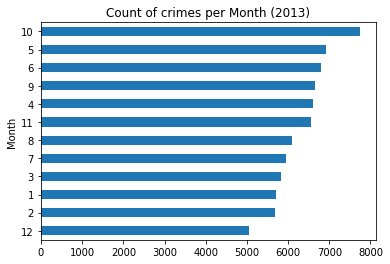

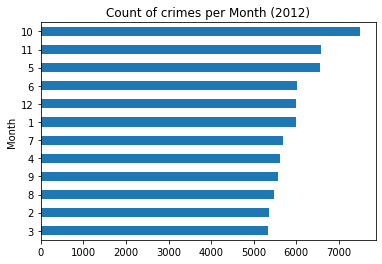

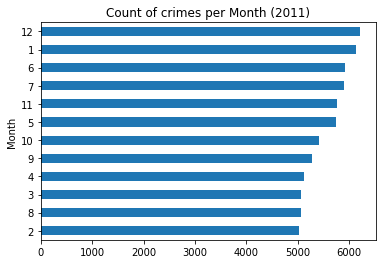

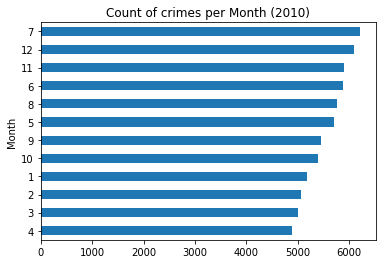

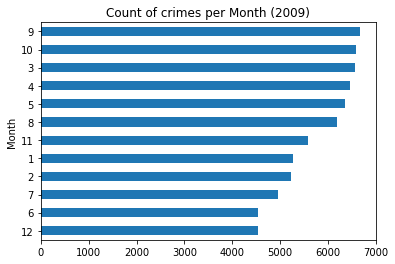

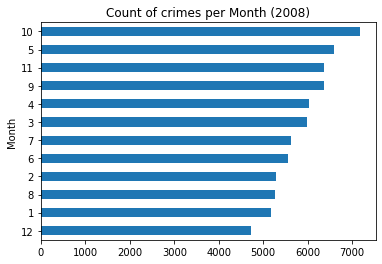

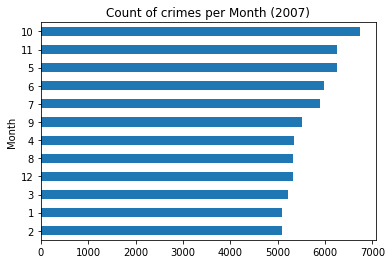

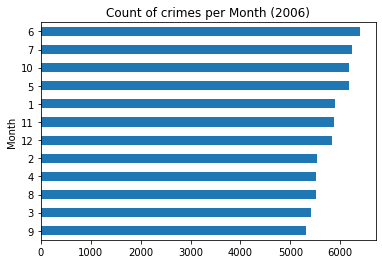

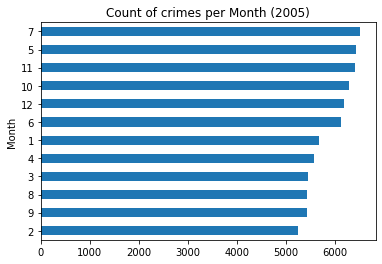

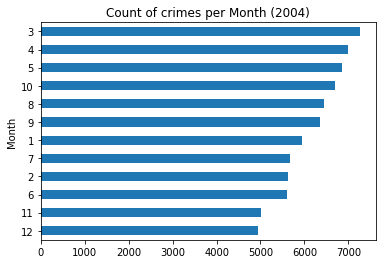

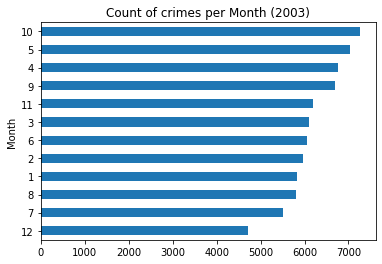

In [225]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('Month')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Month ({y})', fig=(16,5))
    plt.show()

#### We confirm that the data for year 2015 is incomplete ( only 5 months of data is present )

## Crimes per Hour of the Day Visualization:

#### One thing we can do is to group hours into easy to read time slots  ( of 4 hours ):
    - 16 ~ 20h
    - 20 ~ 00h
    - 01 ~ 04h
    - 04 ~ 08h
    - 08 ~ 12h
    - 12 ~ 16h
( We can later check which crimes are commited when :-) )

In [226]:
# Create a new Column TimeSlot

def get_timeslot(hour):
    if hour > 16 and hour <= 20:
        return '16h - 20h'
    elif hour > 20 or hour == 0:
        return '20h - 00h'
    elif hour > 0 and hour <= 4:
        return '00h - 04h'
    elif hour > 4 and hour <= 8:
        return '04h - 08h'
    elif hour > 8 and hour <= 12:
        return '08h - 12h'
    elif hour > 12 and hour <= 16:
        return '12h - 16h'
    else:
        return 'wtf'

train_df['TimeSlot']  = train_df.Hour.apply(get_timeslot)

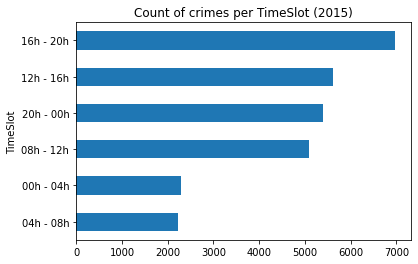

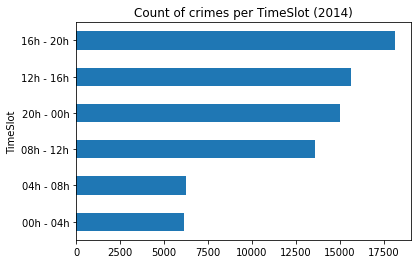

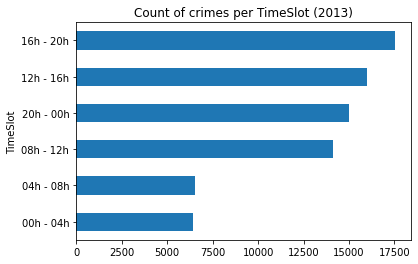

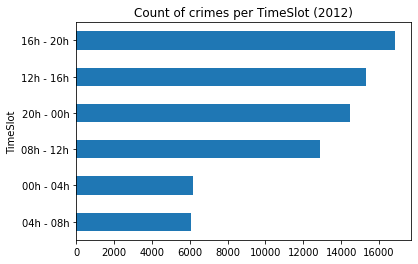

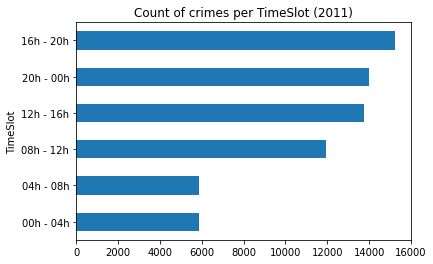

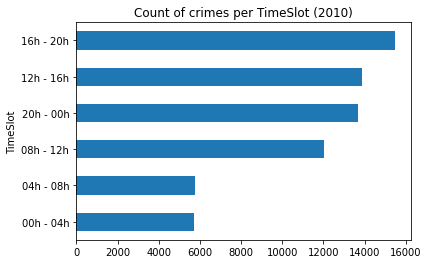

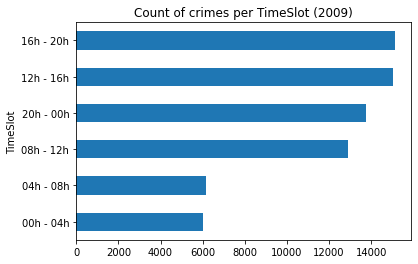

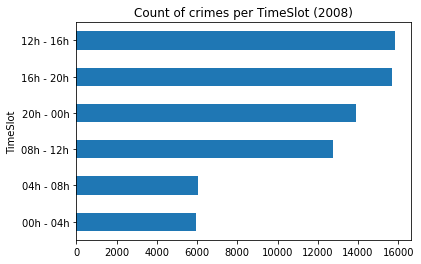

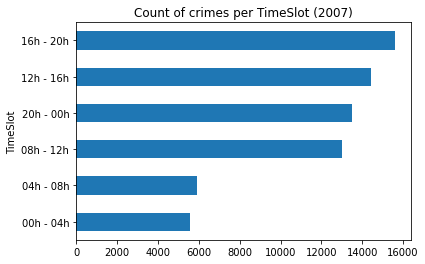

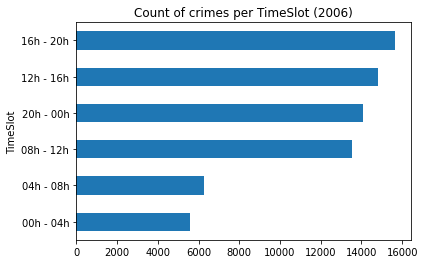

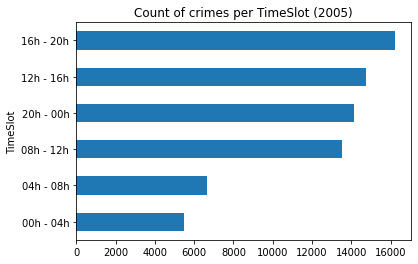

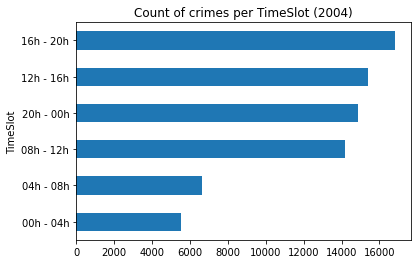

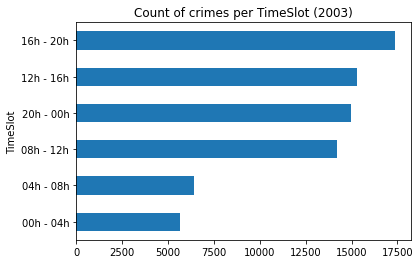

In [227]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per TimeSlot ({y})', fig=(18,7))
    plt.show()

#### We can see that in each year, the most of the crimes are commited between 16h and 20h, whereas fewer crimes are commited between 00h and 08h

In [228]:
train_df.to_csv('data/train_clean_1.csv',index=False)
print('Done Outputing')

Done Outputing


In [237]:
train_df1 = pd.read_csv('./data/train_clean_1.csv')
train_df1.sample(3)

DateTime        Category           Descript DayOfWeek  \
821742  2003-10-02 07:00:00         RUNAWAY            RUNAWAY  Thursday   
82630   2014-04-05 22:00:00   VEHICLE THEFT  STOLEN AUTOMOBILE  Saturday   
175913  2013-01-12 02:13:00  OTHER OFFENSES   RESISTING ARREST  Saturday   

       PdDistrict      Resolution                     Address           X  \
821742       PARK            NONE       1200 Block of PAGE ST -122.441394   
82630   INGLESIDE            NONE         0 Block of TIOGA AV -122.404043   
175913    TARAVAL  ARREST, BOOKED  200 Block of BUCKINGHAM WY -122.478885   

                Y  Year  Month  Hour  MonthSin  MonthCos  DayOfWeekInt  \
821742  37.771727  2003     10     7 -0.866025  0.500000             4   
82630   37.716149  2014      4    22  0.866025 -0.500000             6   
175913  37.725844  2013      1     2  0.500000  0.866025             6   

        DayOfWeekSin  DayOfWeekCos   HourSin   HourCos   TimeSlot  
821742     -0.433884     -0.900969  0.965926 -0.258819  04h - 08h  
82630      -0.781831      0.623490 -0.500000  0.866025  20h - 00h  
175913     -0.781831      0.623490  0.500000  0.866025  00h - 04h

#### Another nice feature to have, is whether it's night or day. We'll create a new binary column for it, where 1 is Day and 0 is Night

In [238]:
# Create IsDay Column
train_df1['IsDay']  = train_df1.Hour.apply(lambda x: 1 if (x > 7 and x < 20) else 0)

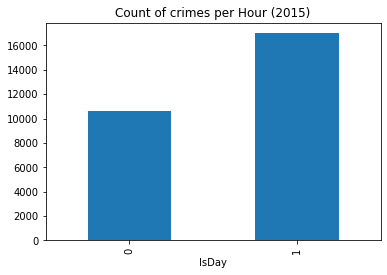

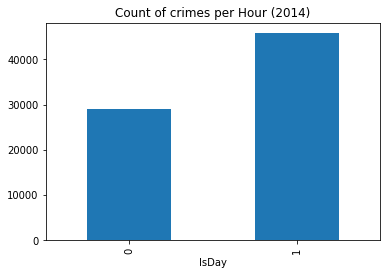

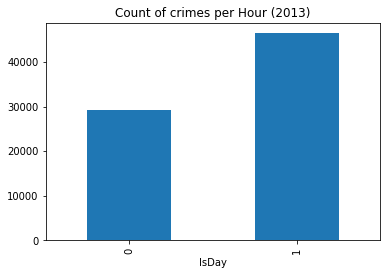

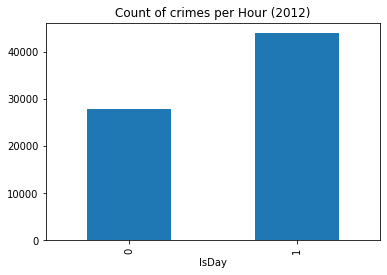

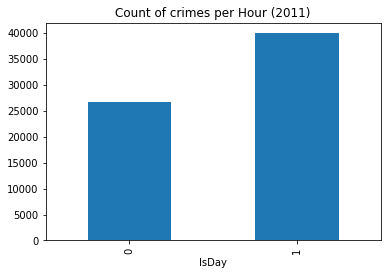

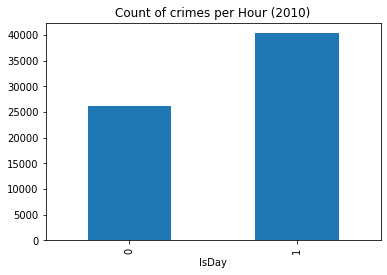

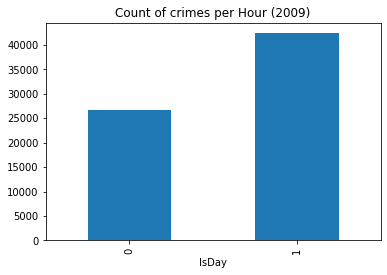

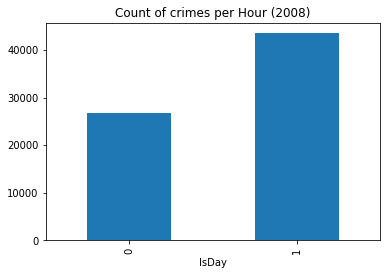

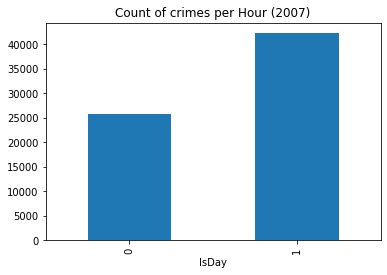

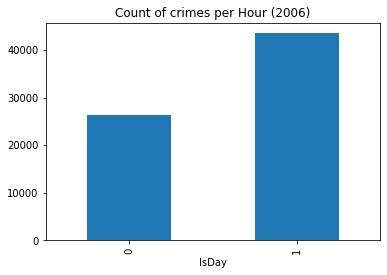

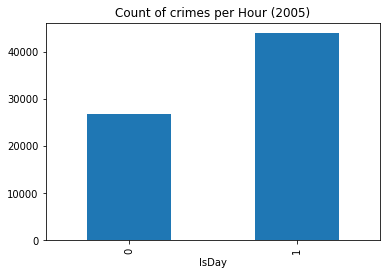

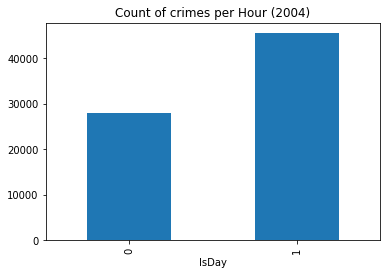

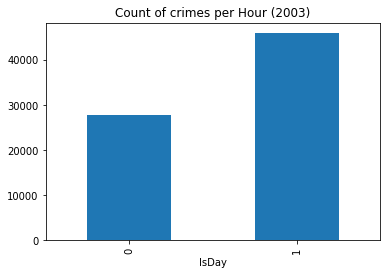

In [240]:
for y in train_df1.Year.unique():
    ax = train_df1[train_df1['Year'] == y].groupby('IsDay')['Descript'].count().sort_values().plot(kind='bar', title=f'Count of crimes per Hour ({y})', fig=(18,7))
    plt.show()

#### We can see that most of the crimes occur by day, but that doesn't mean much for now. We shall see next, after we include the category of the crime, which crimes most occur by day/night.

- We can see that there are in total **39 unique values** this column can take

- Let's see how many crimes there are in each category to get a glimpse of the distribution :

In [246]:
gb = (train_df1.groupby('Category')['Descript'].count()/len(train_df))*100
assert int(gb.sum()) == 100
gb.sort_values(inplace=True)
gb

Category
TREA                            0.000683
PORNOGRAPHY/OBSCENE MAT         0.002506
GAMBLING                        0.016628
SEX OFFENSES NON FORCIBLE       0.016856
EXTORTION                       0.029156
BRIBERY                         0.032914
BAD CHECKS                      0.046239
FAMILY OFFENSES                 0.055919
SUICIDE                         0.057856
EMBEZZLEMENT                    0.132794
LOITERING                       0.139514
ARSON                           0.172314
LIQUOR LAWS                     0.216731
RUNAWAY                         0.221628
DRIVING UNDER THE INFLUENCE     0.258300
KIDNAPPING                      0.266614
RECOVERED VEHICLE               0.357383
DRUNKENNESS                     0.487444
DISORDERLY CONDUCT              0.492000
SEX OFFENSES FORCIBLE           0.499744
STOLEN PROPERTY                 0.517055
TRESPASS                        0.834350
PROSTITUTION                    0.852344
WEAPON LAWS                     0.974319
SECONDA

#### We can clearly see that 15 of the categories account for ~93% of the crimes ! ( whereas the remaining 24 categories account only for ~7% )
- Let's make a quick visualization :

Text(0.5, 0, 'Crime Percentage')

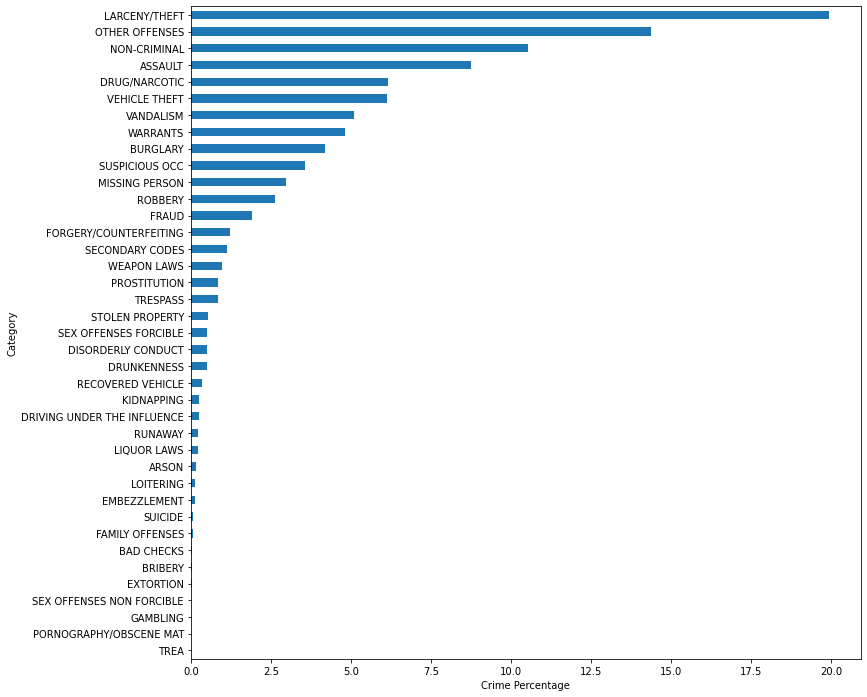

In [247]:
ax = gb.plot(kind='barh', figsize=(12,12) )
ax.set_xlabel('Crime Percentage')

#### Let's confirm if the same categories are always in the top each year

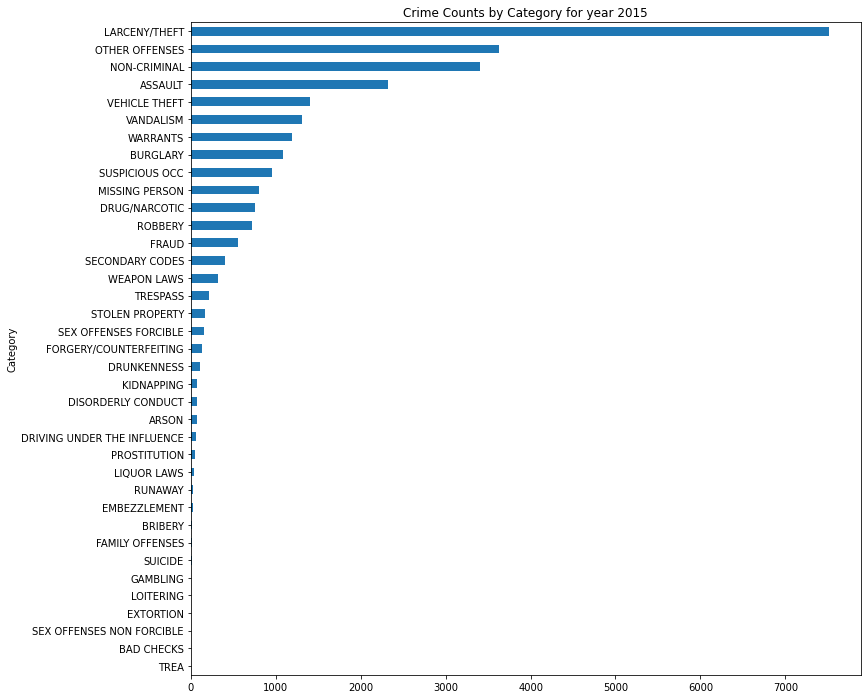

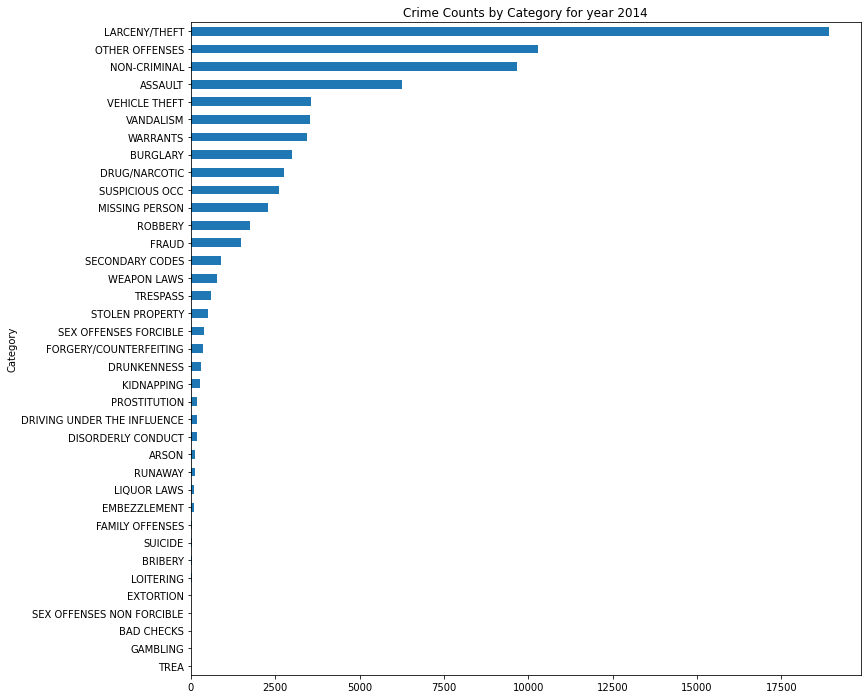

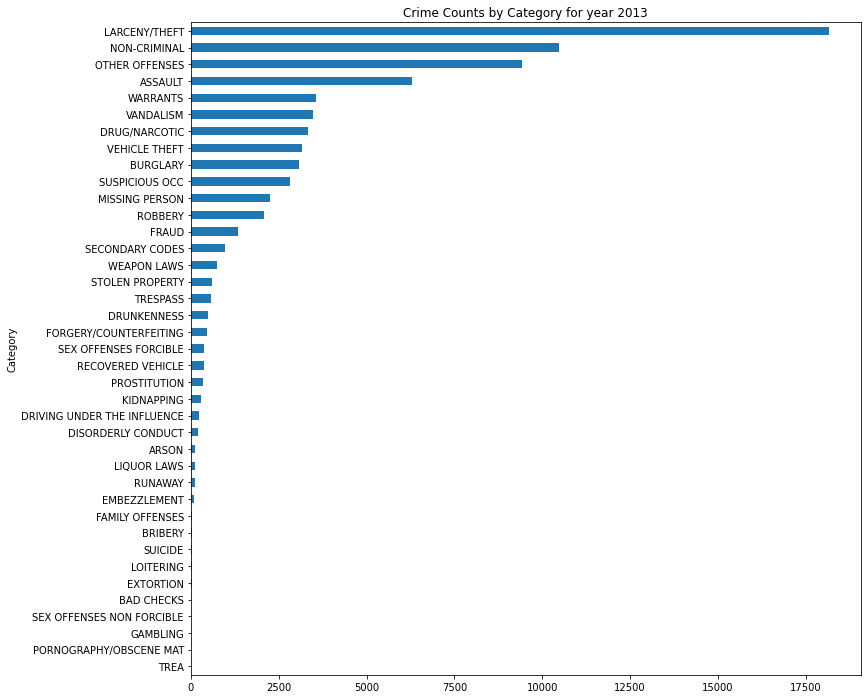

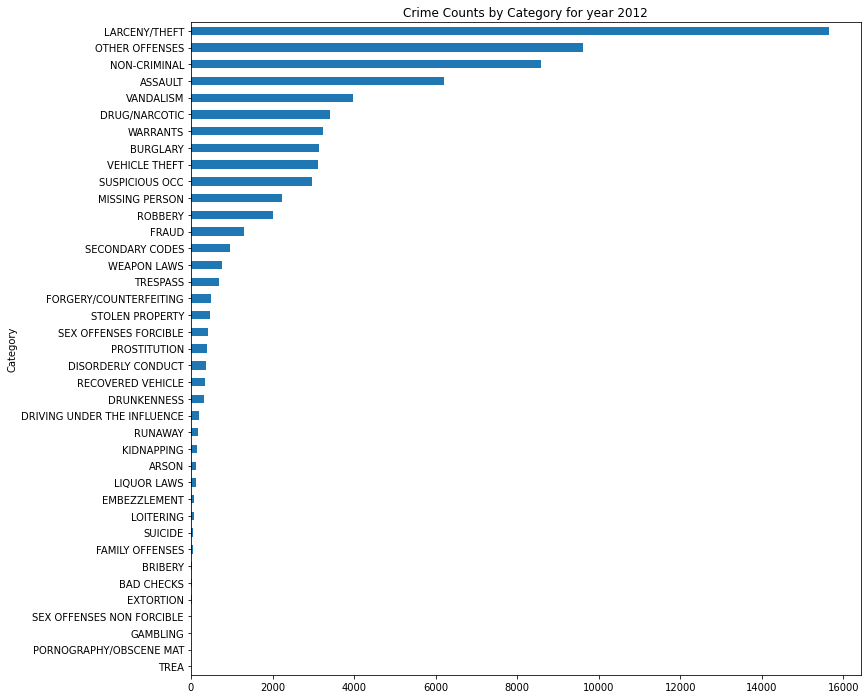

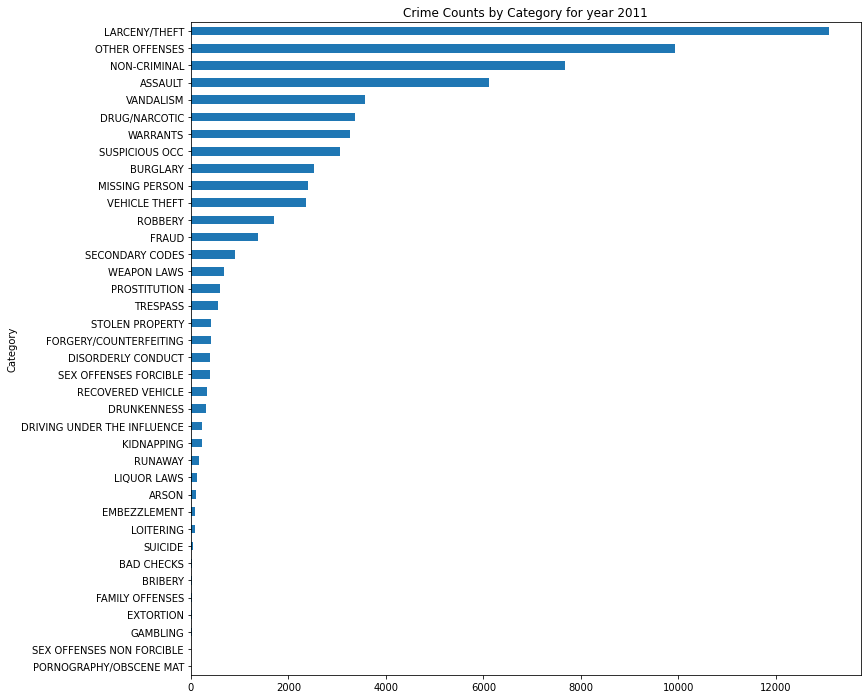

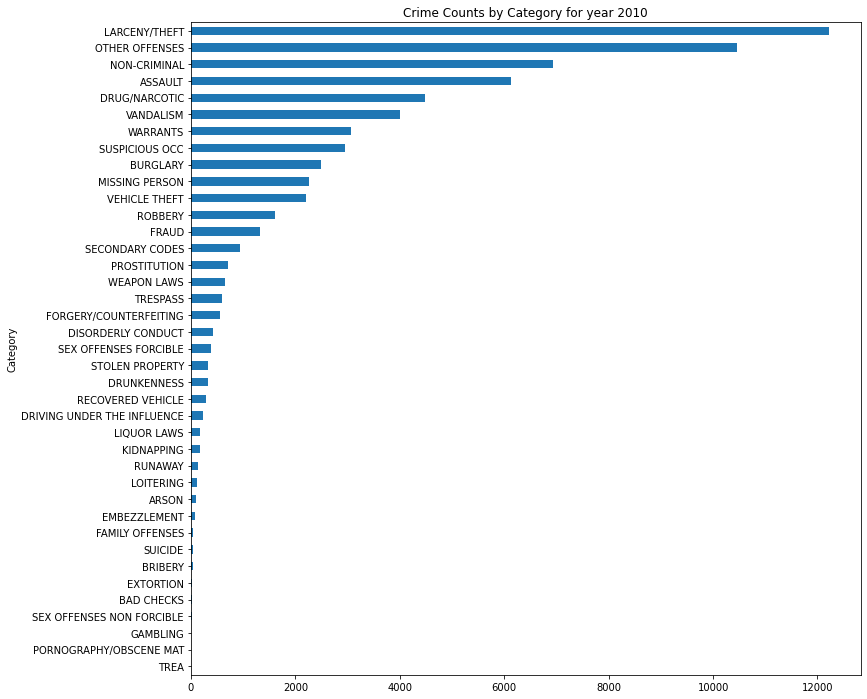

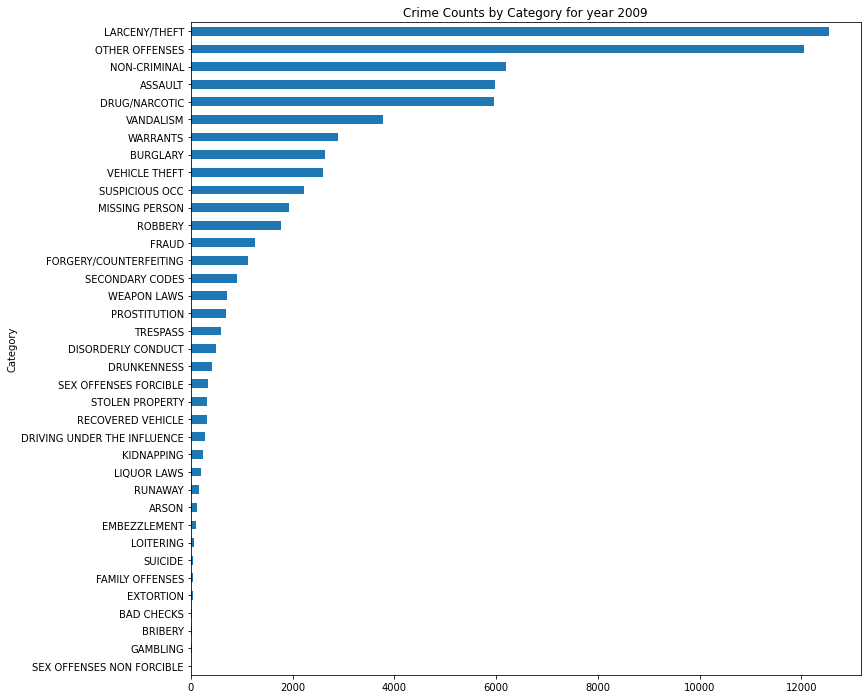

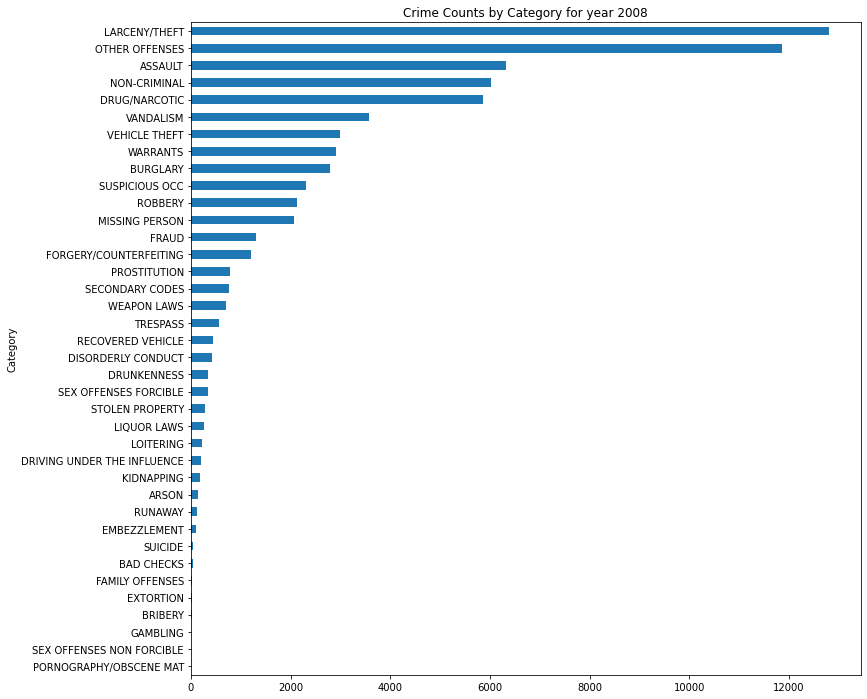

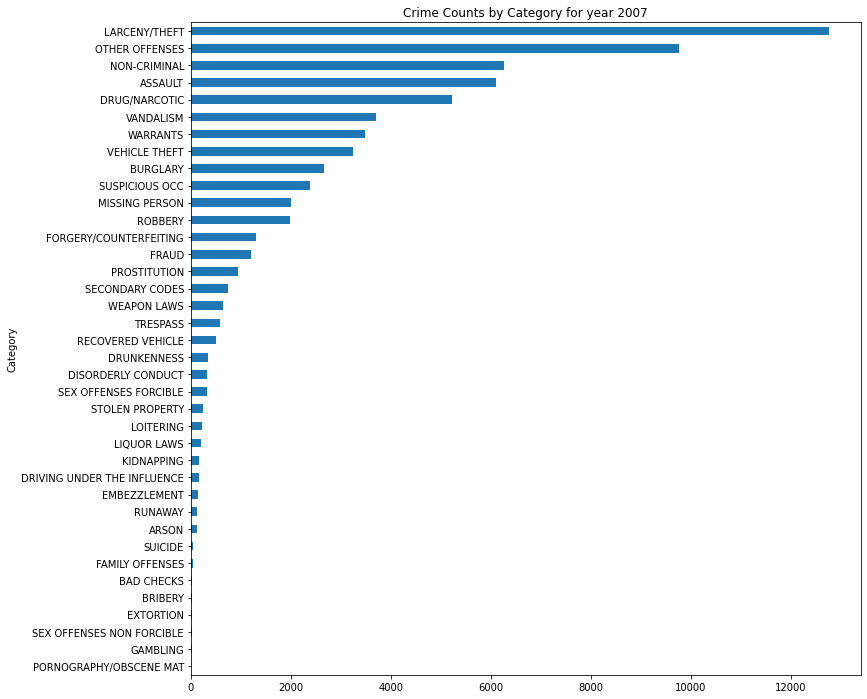

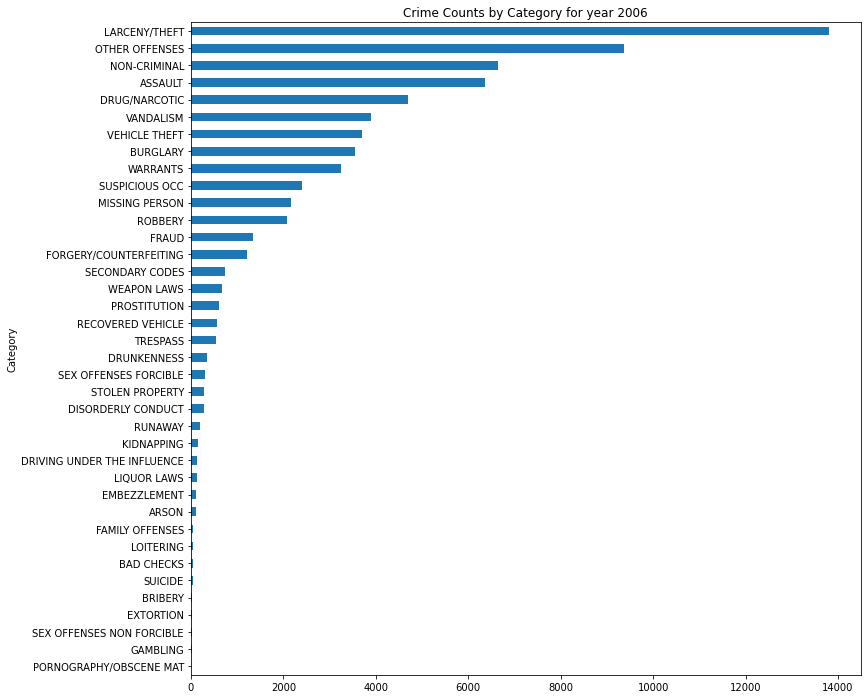

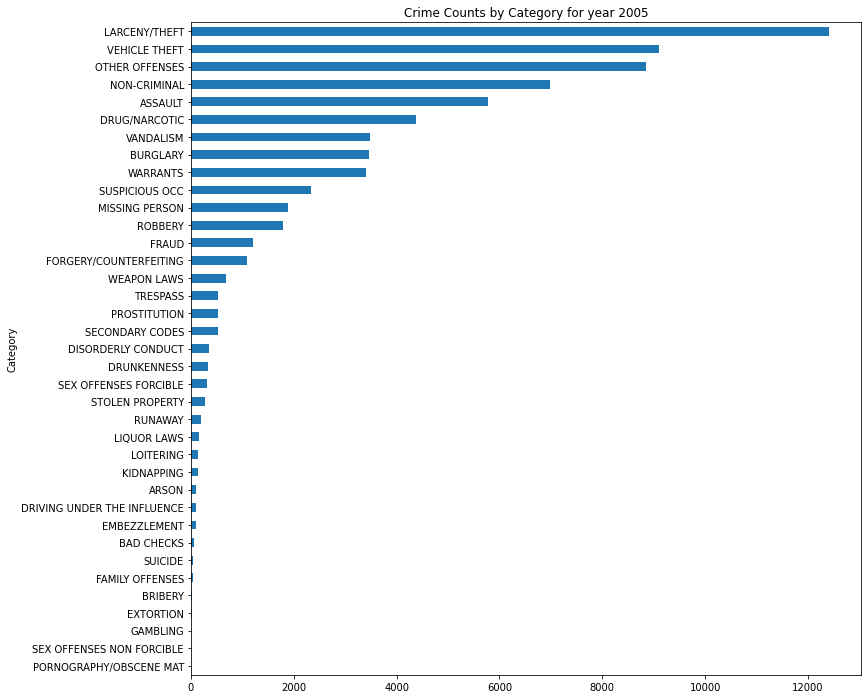

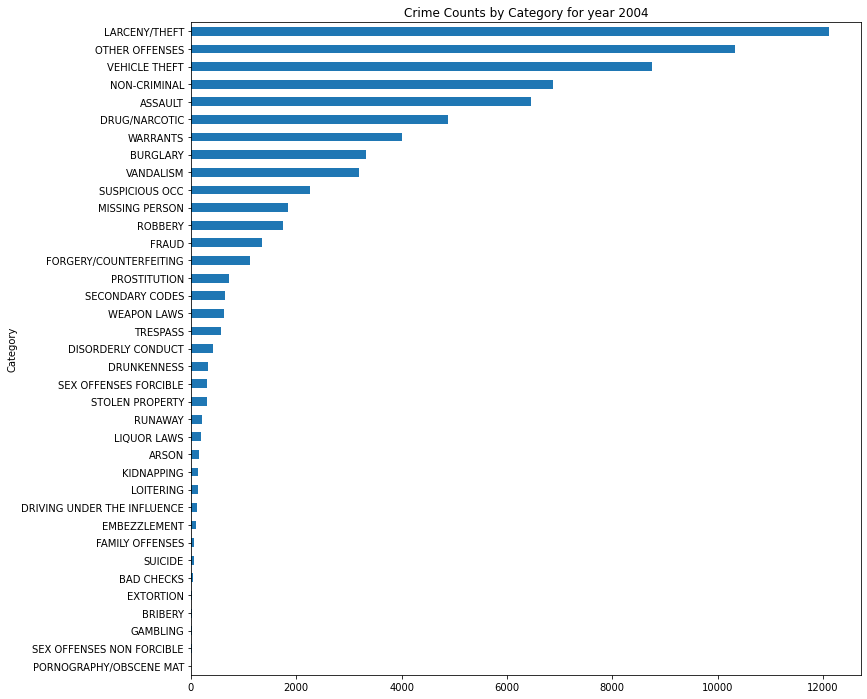

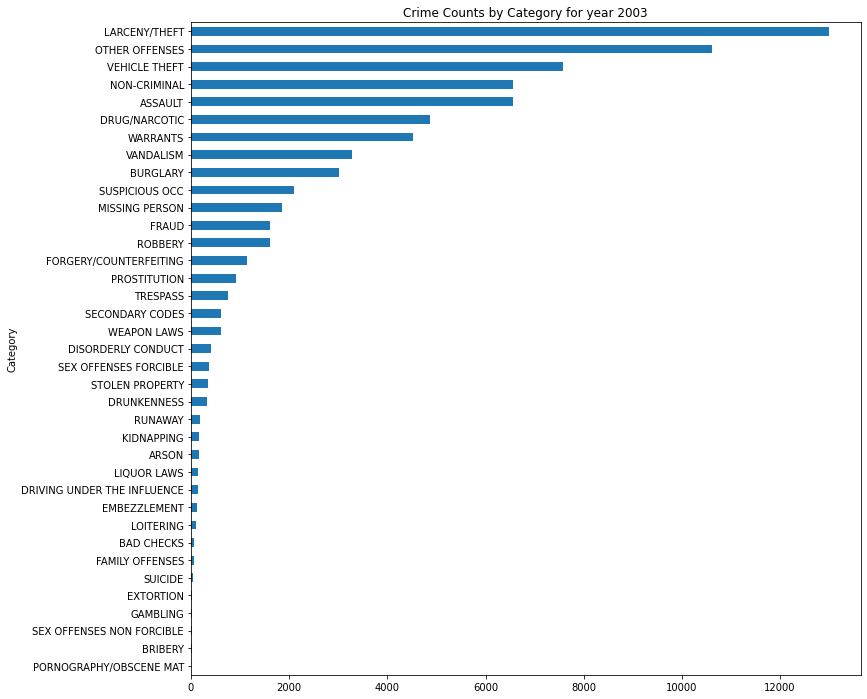

In [248]:
all_years = train_df1.Year.unique()
for y in all_years:
    gb = train_df1[train_df1.Year == y].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(12,12), title=f'Crime Counts by Category for year {y}')
    plt.show()

### Crime Categories by Day Of Week

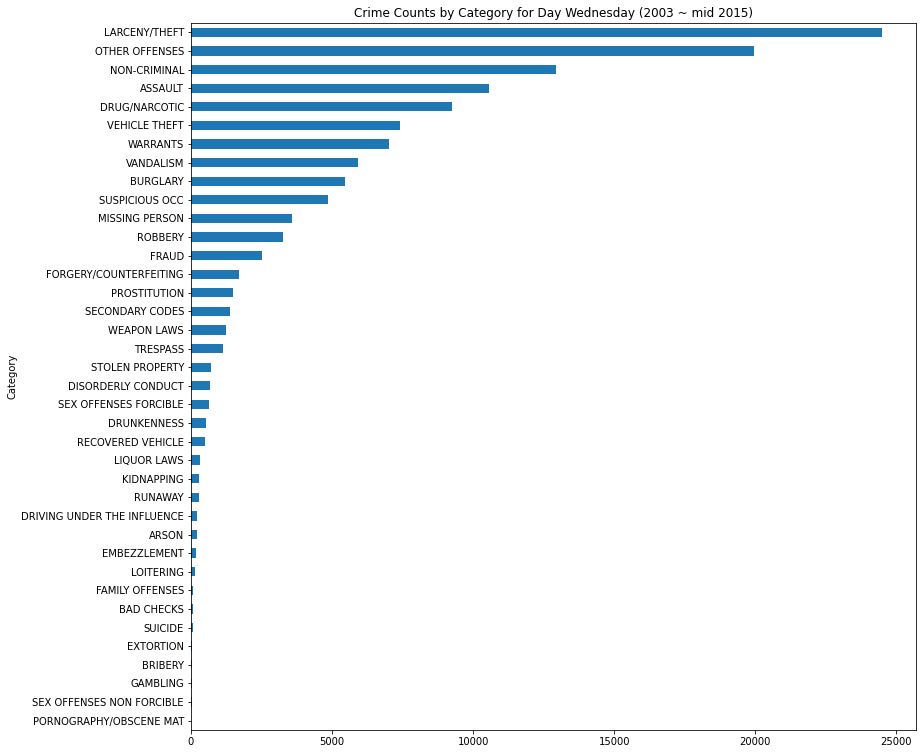

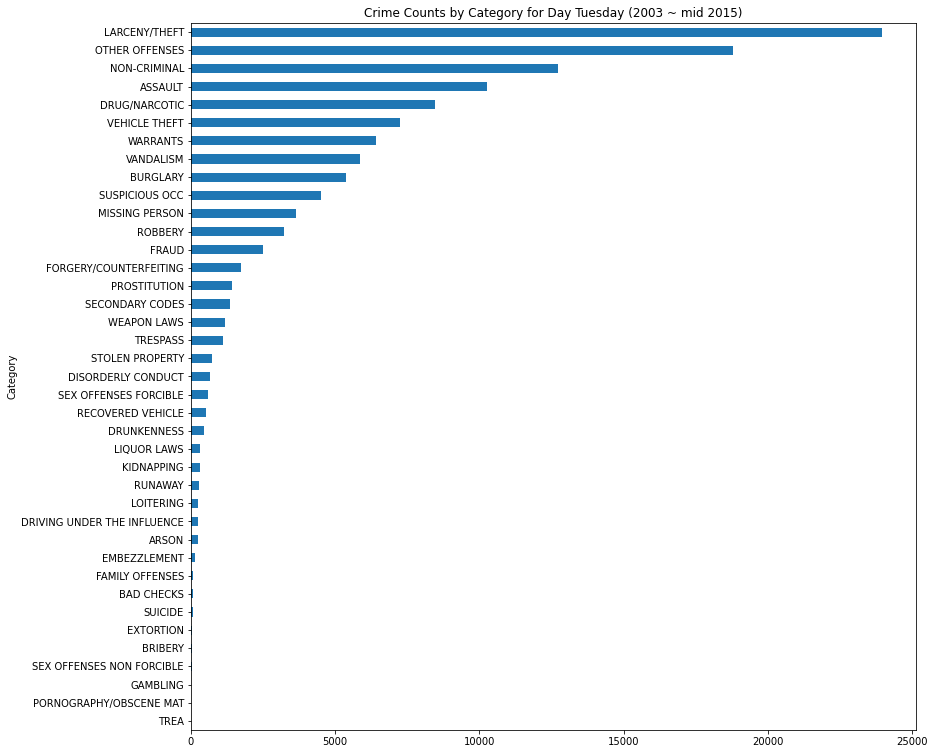

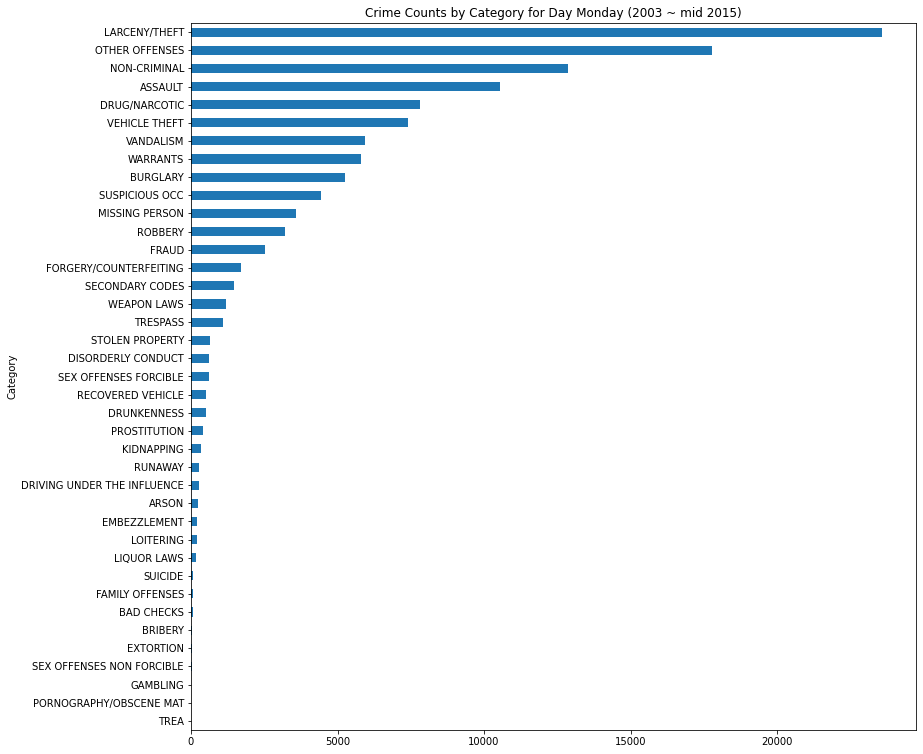

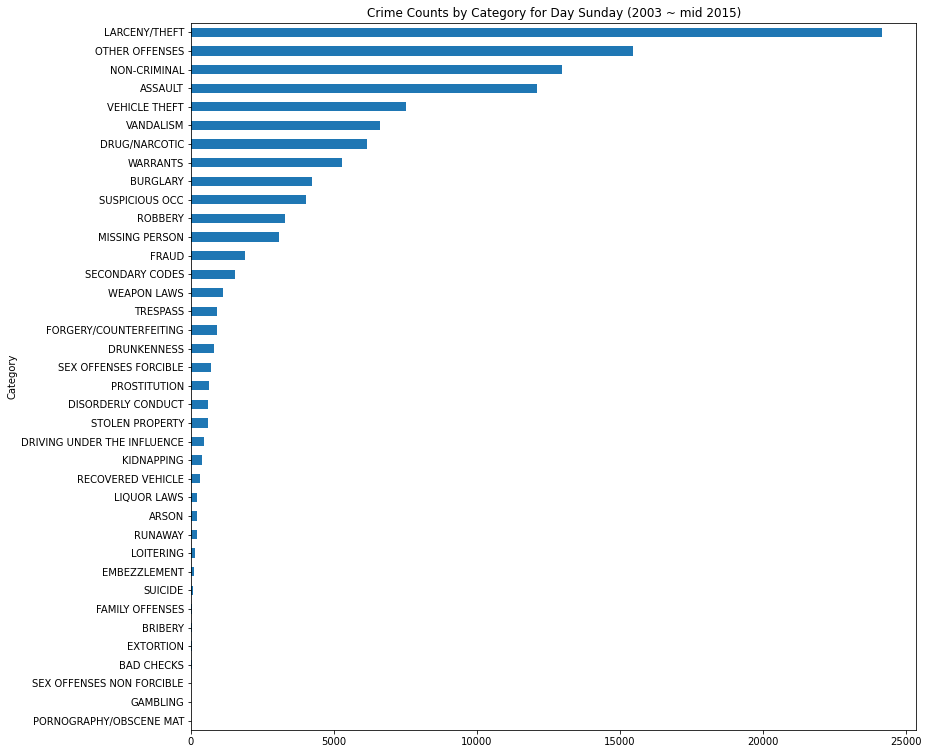

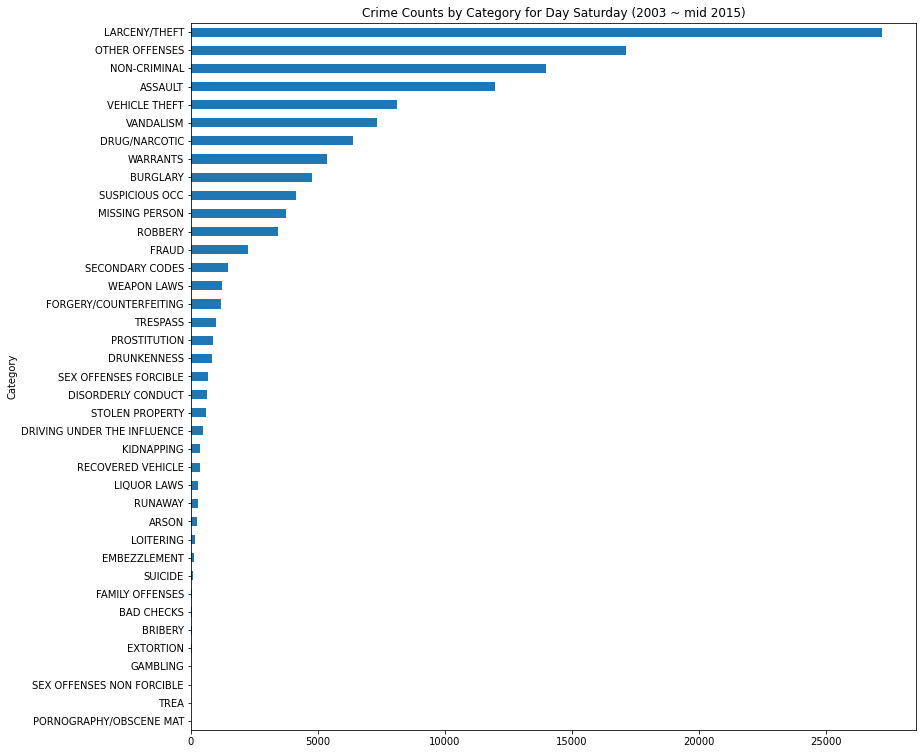

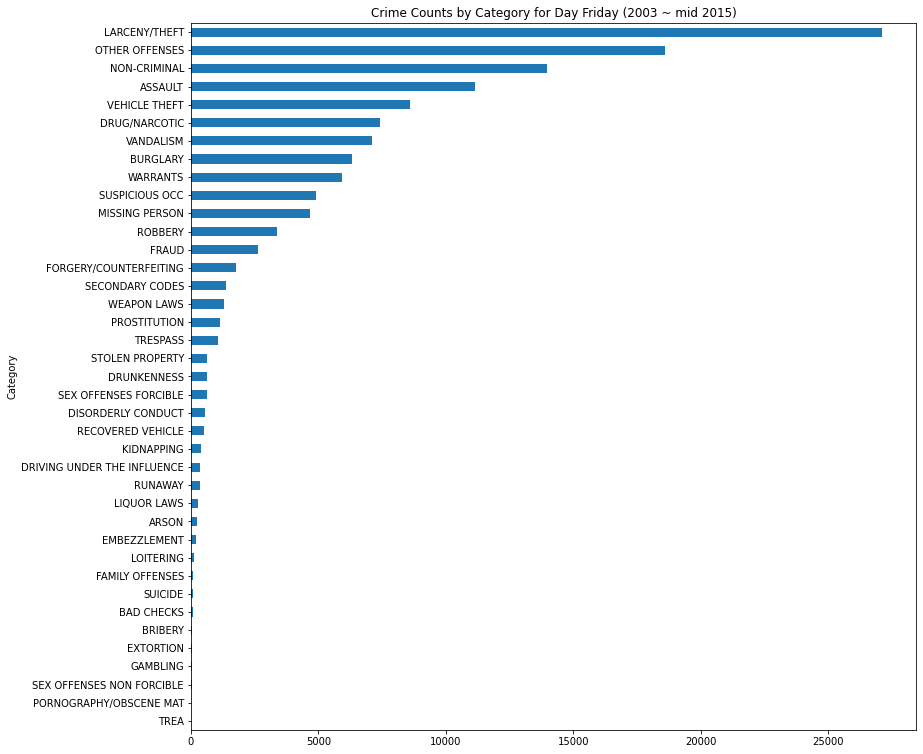

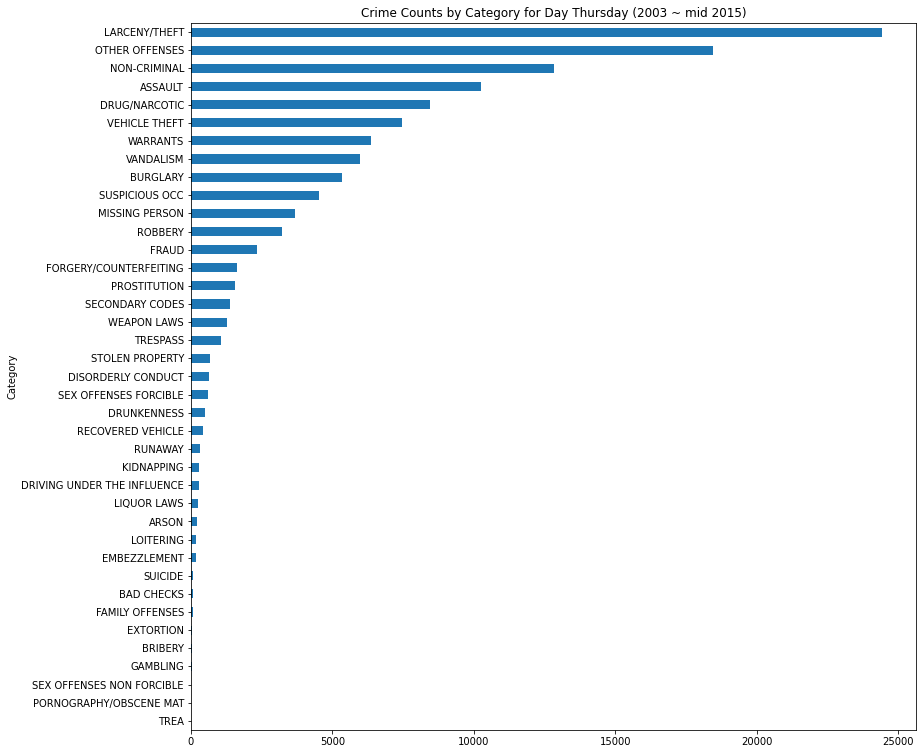

In [249]:
all_days_of_week = train_df1.DayOfWeek.unique()
for d in all_days_of_week:
    gb = train_df1[train_df1.DayOfWeek == d].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for Day {d} (2003 ~ mid 2015)')
    plt.show()

### Crime Categories Day vs Night

- An interesting to see, is which crimes occur mostly **by day vs by night**

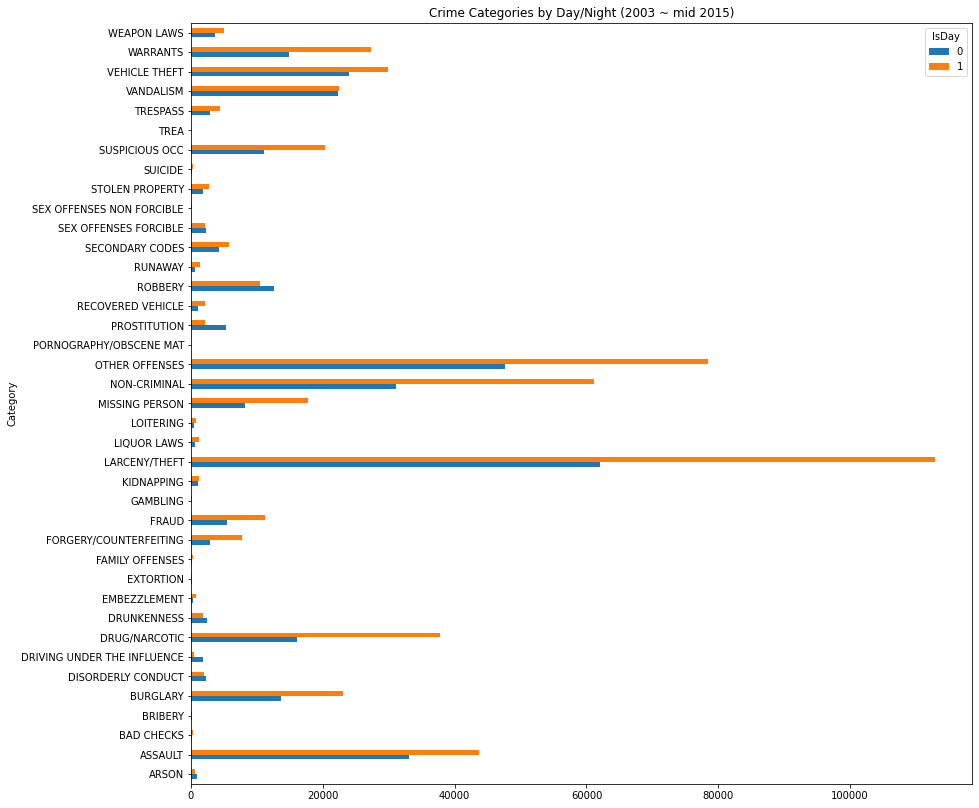

In [250]:
ct = pd.crosstab(train_df1.Category, train_df1.IsDay)
ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night (2003 ~ mid 2015)')

#### Let's check the same thing for each year

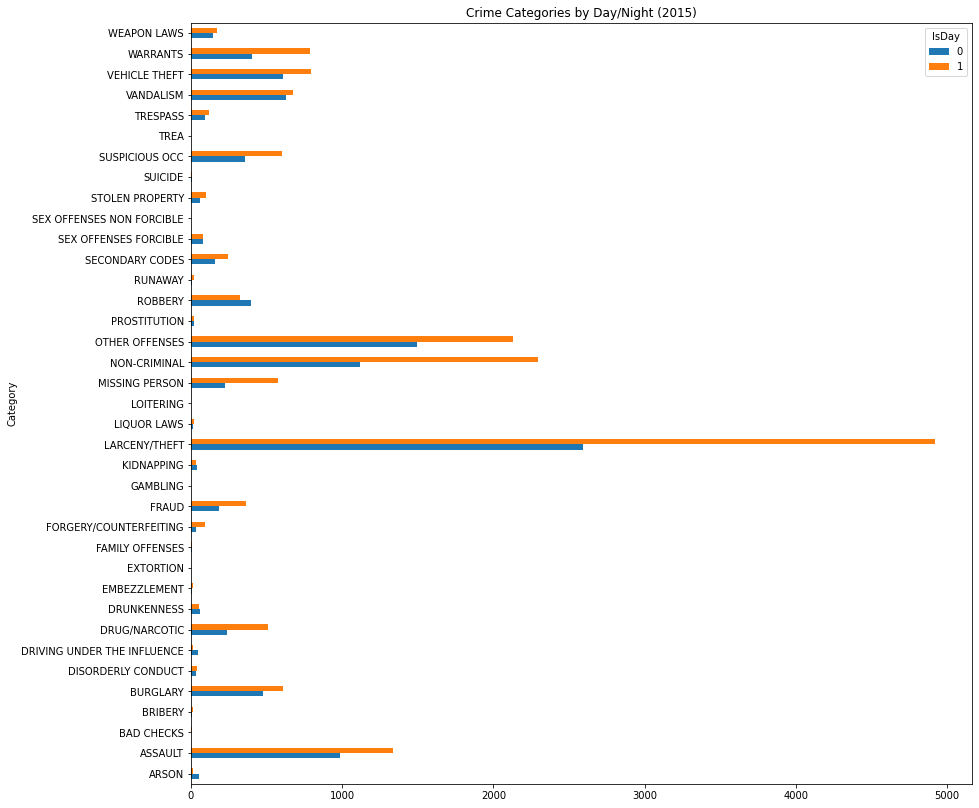

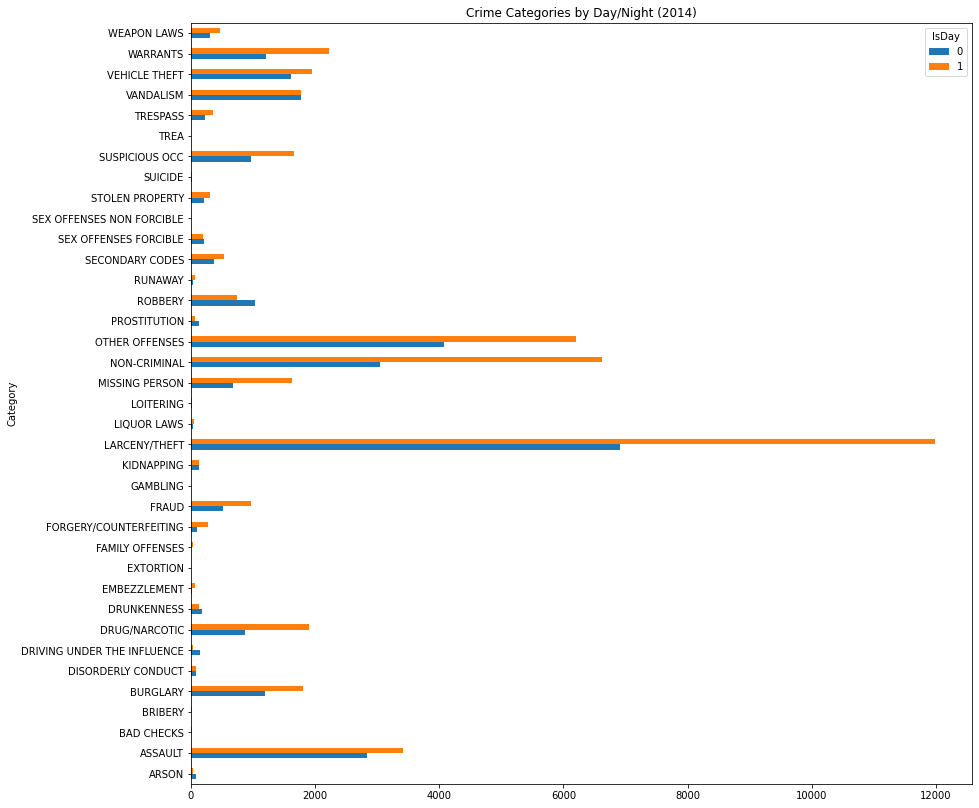

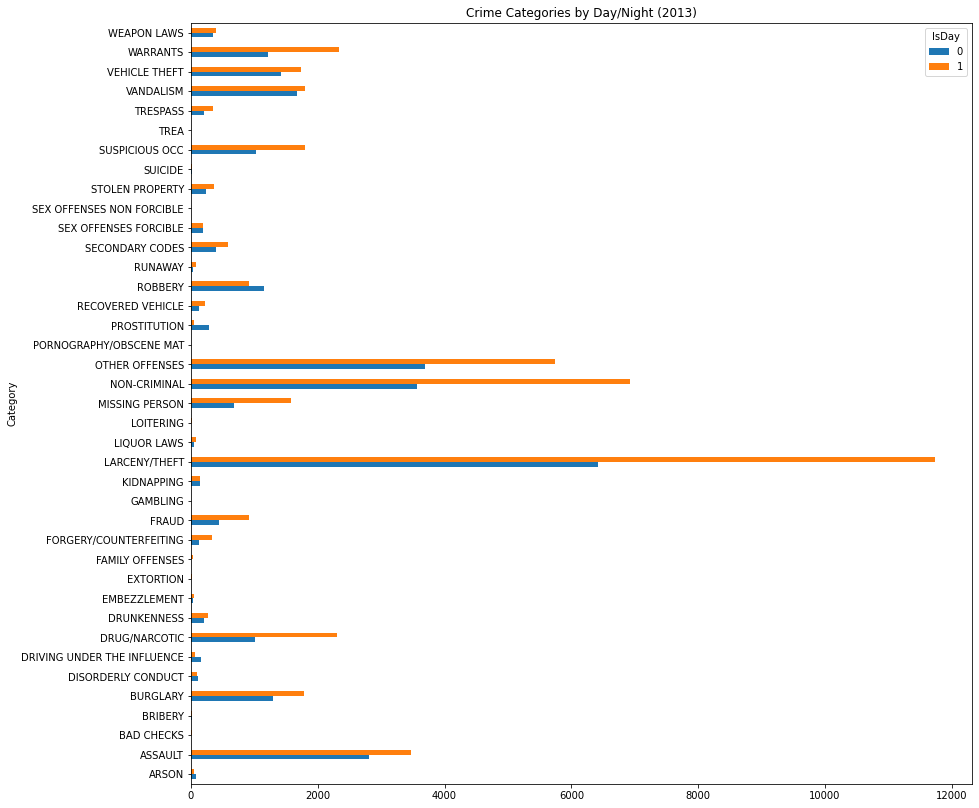

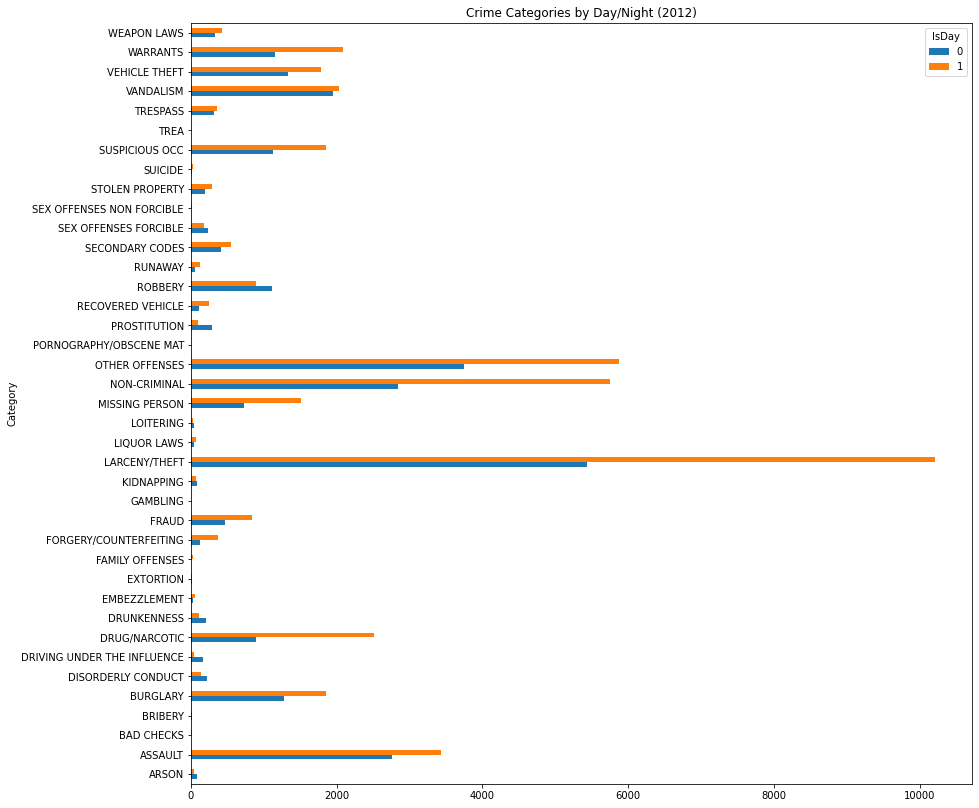

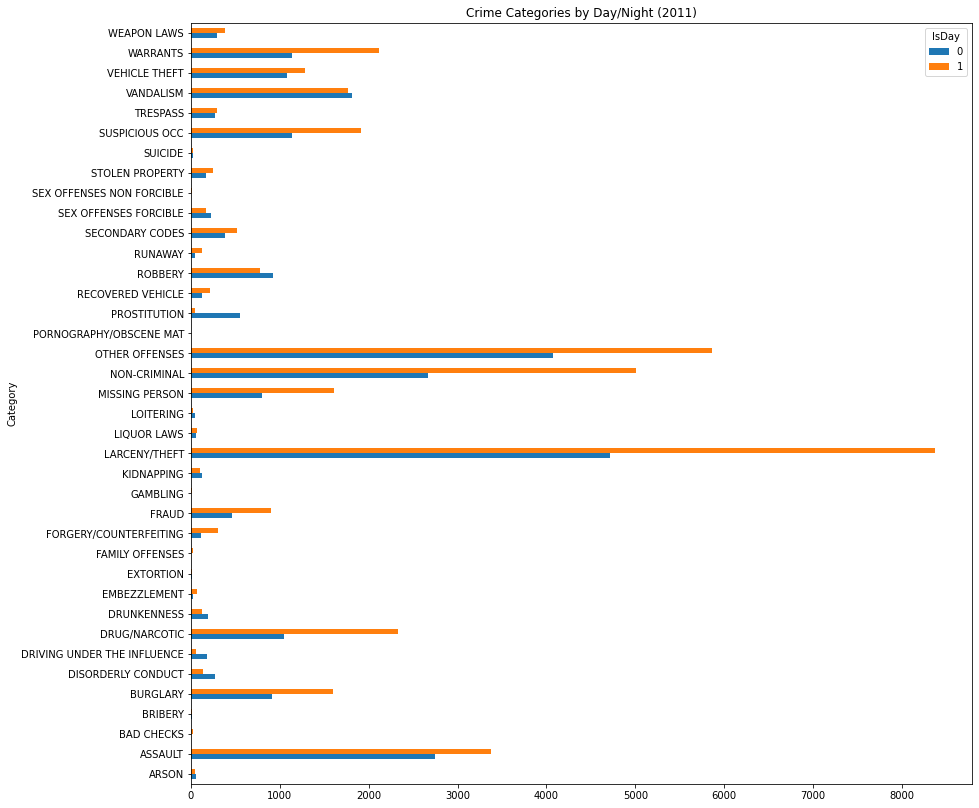

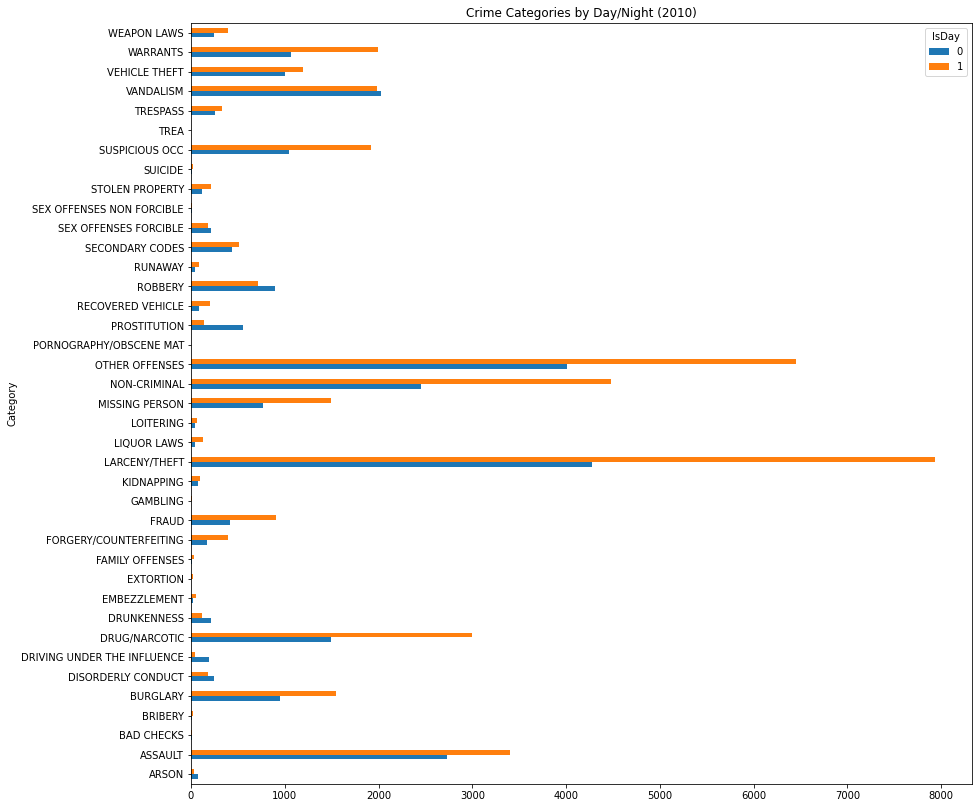

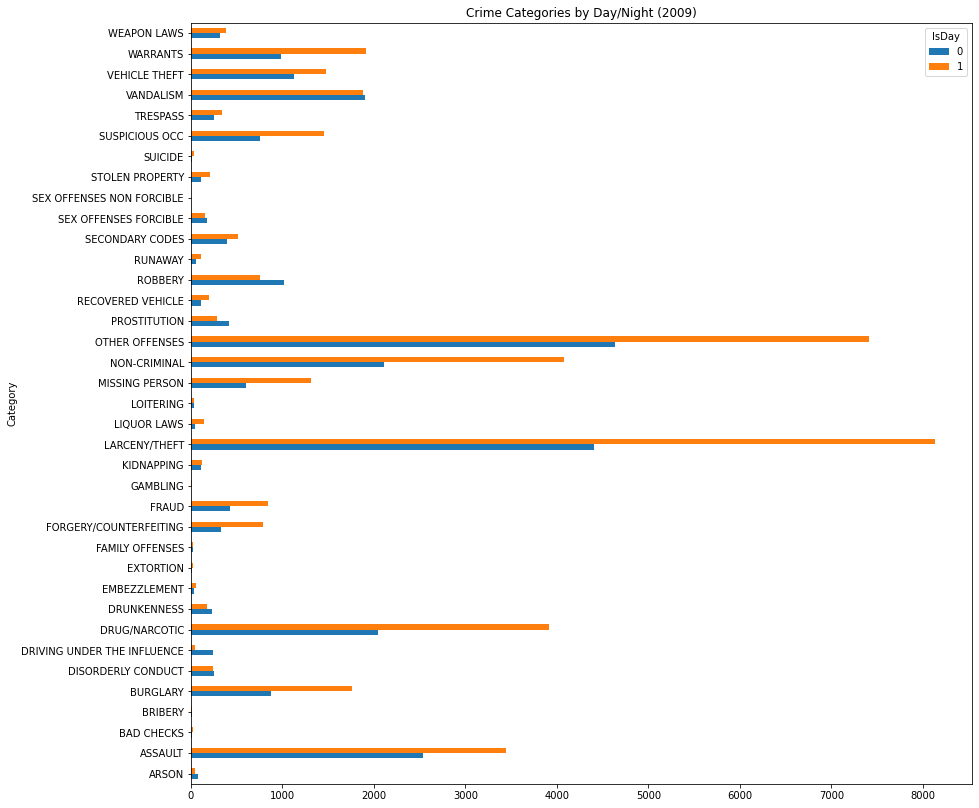

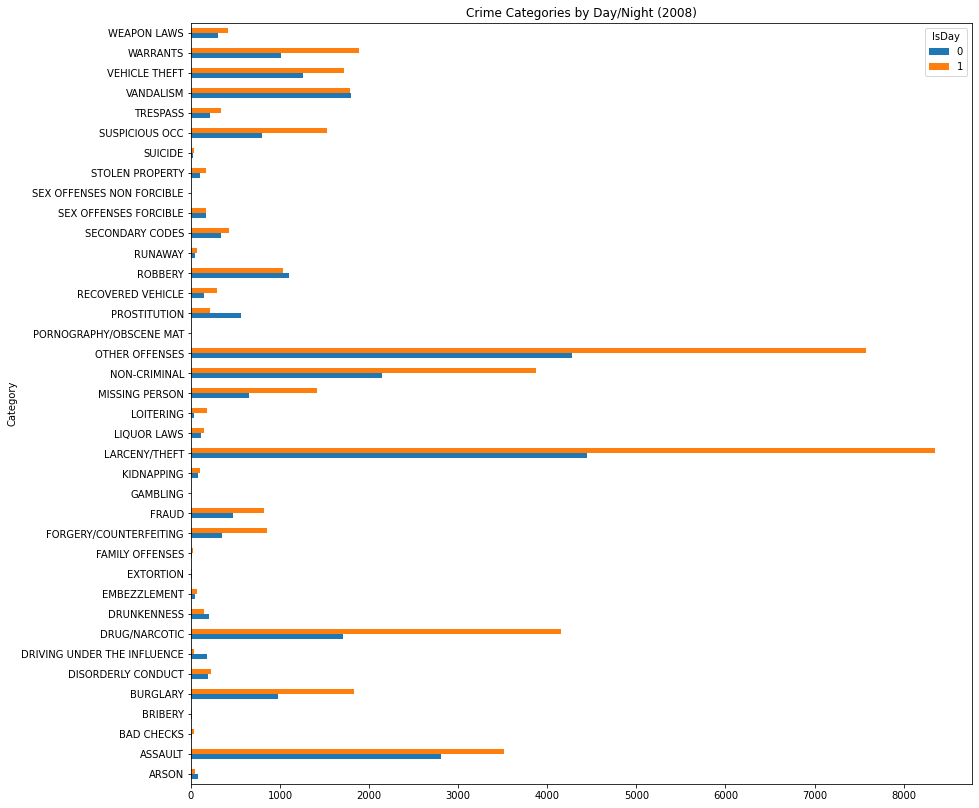

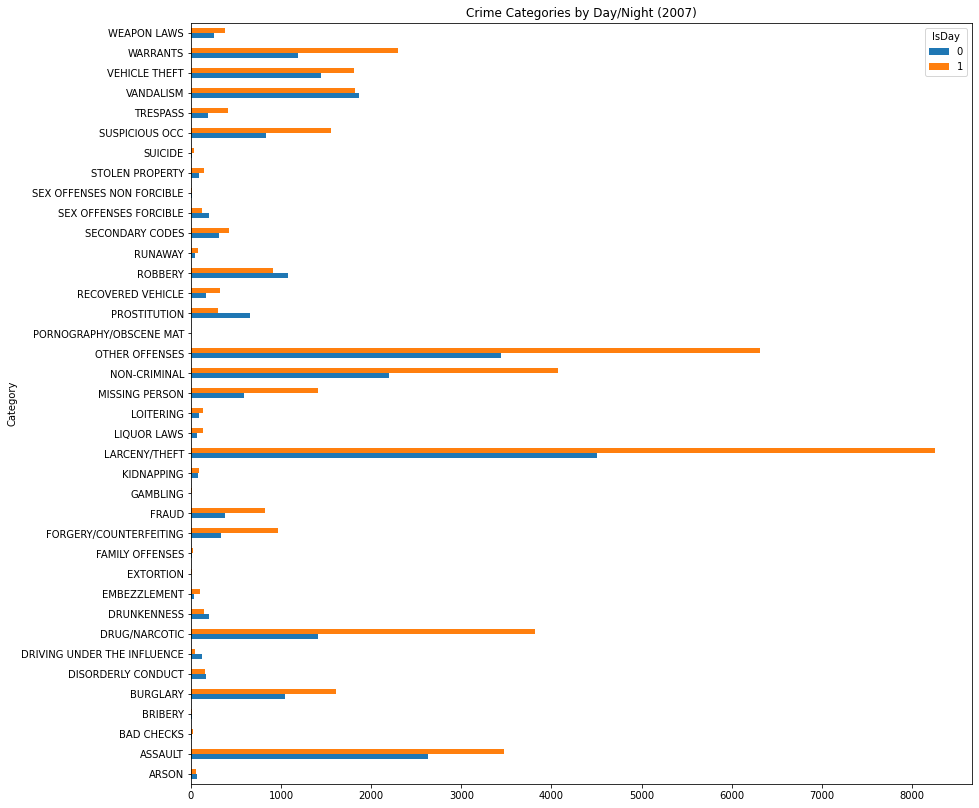

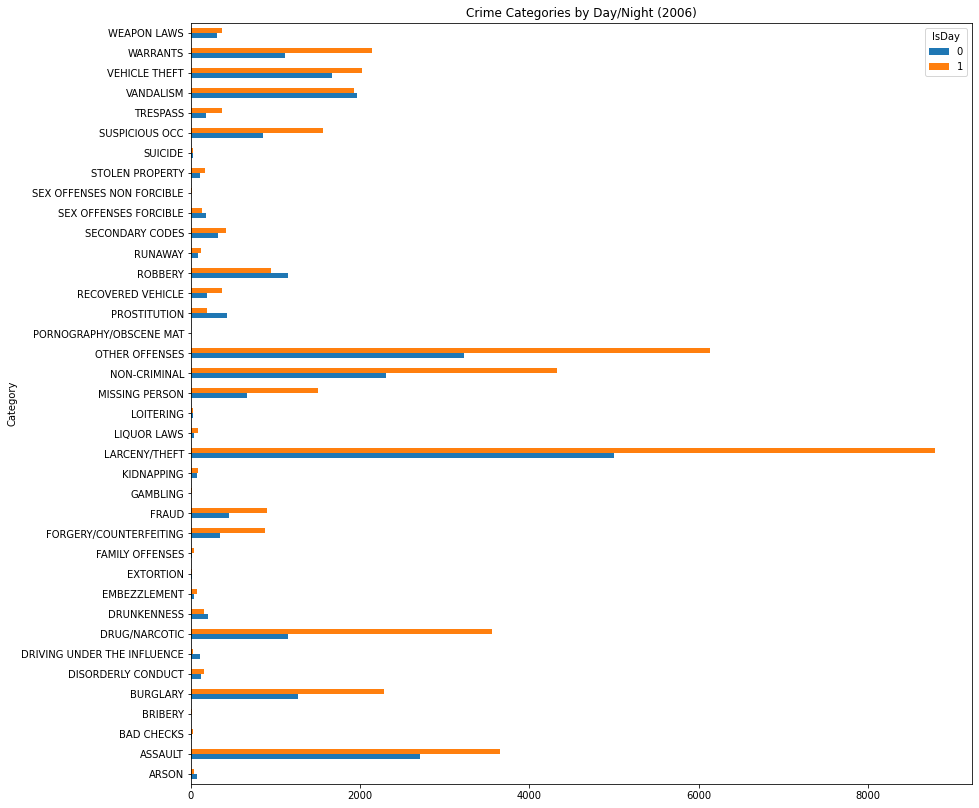

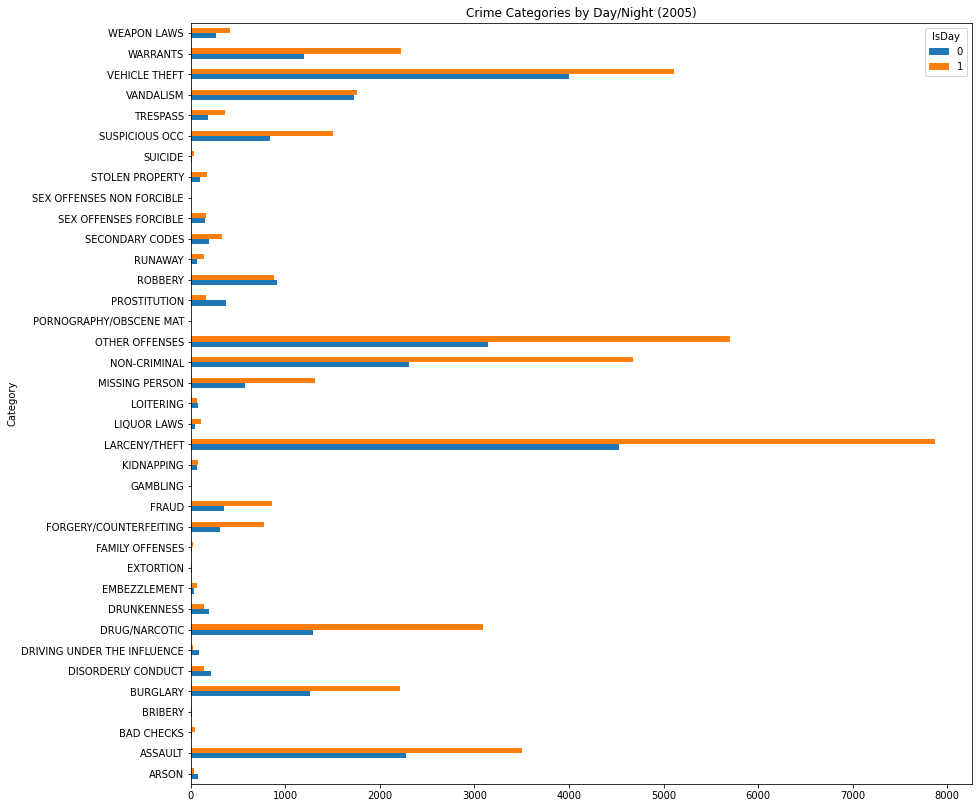

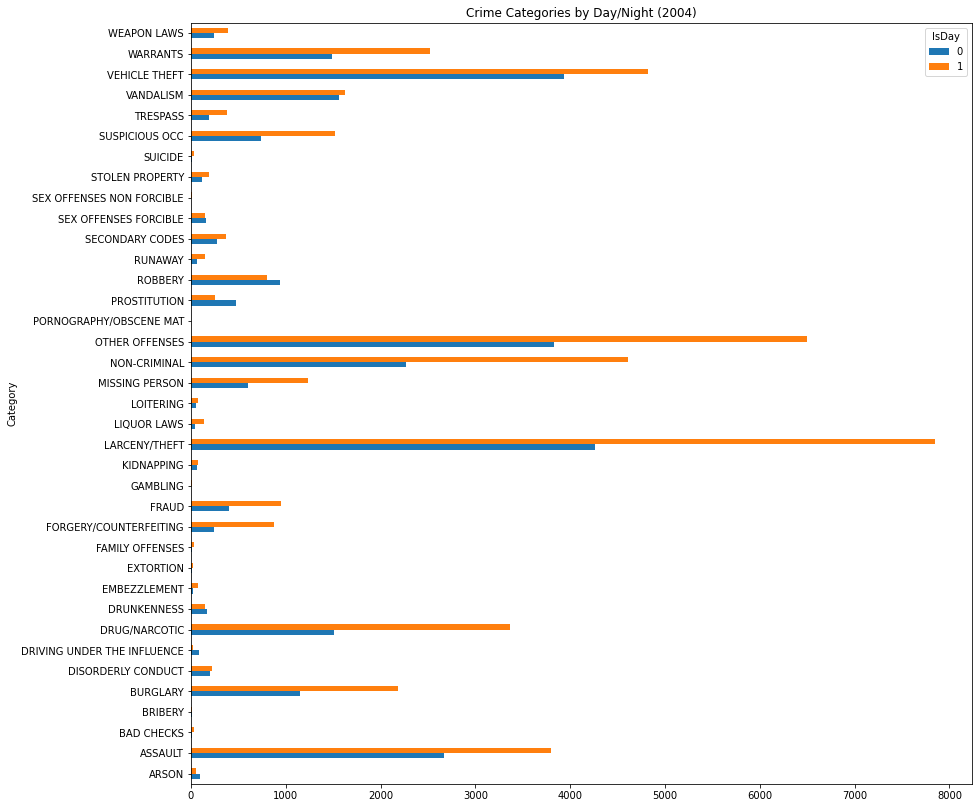

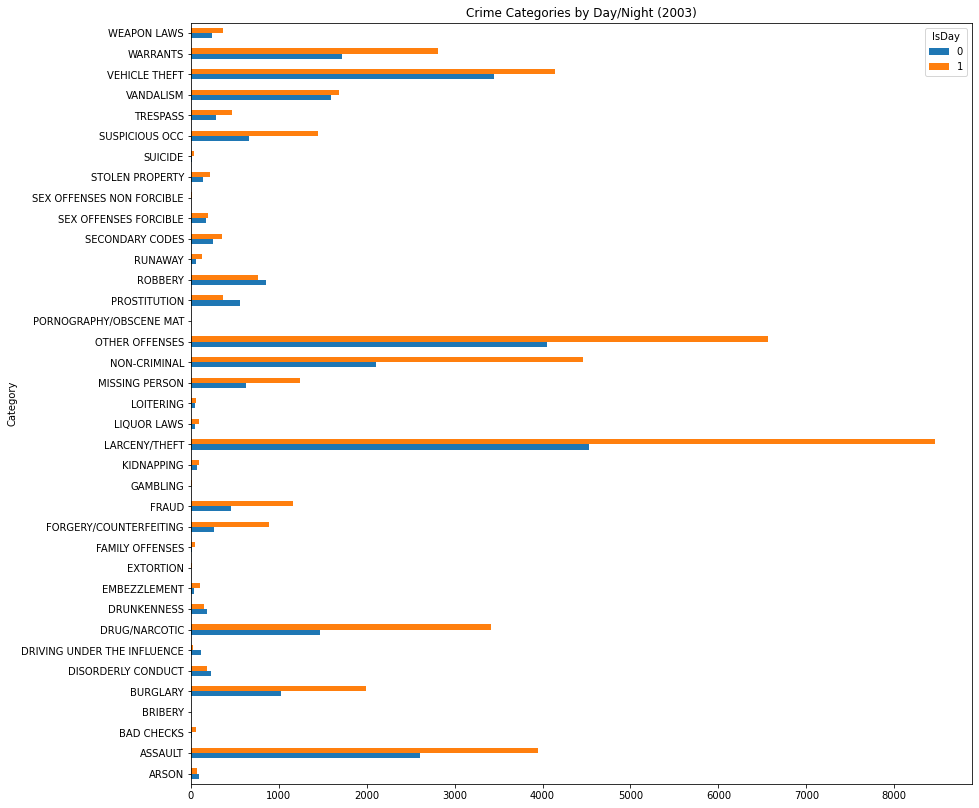

In [251]:
for y in all_years:
    ct = pd.crosstab(train_df1[train_df1.Year == y].Category, train_df1[train_df1.Year == y].IsDay)
    ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night ({y})')
    plt.show()

### Crime Categories by Timeslot

#### Now let's check the how crimes's categories change by time slot

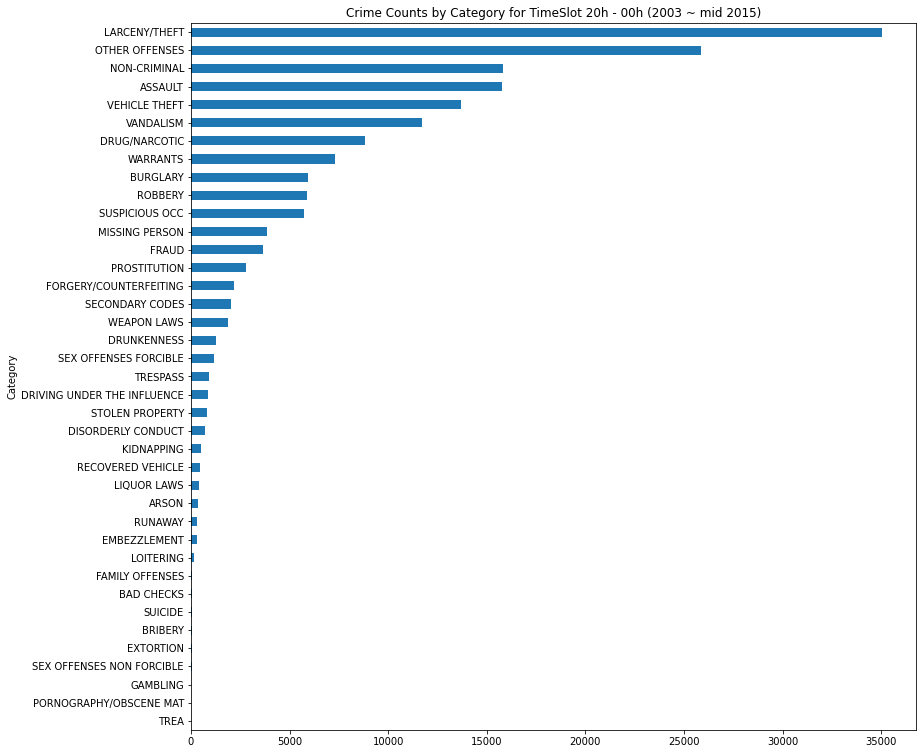

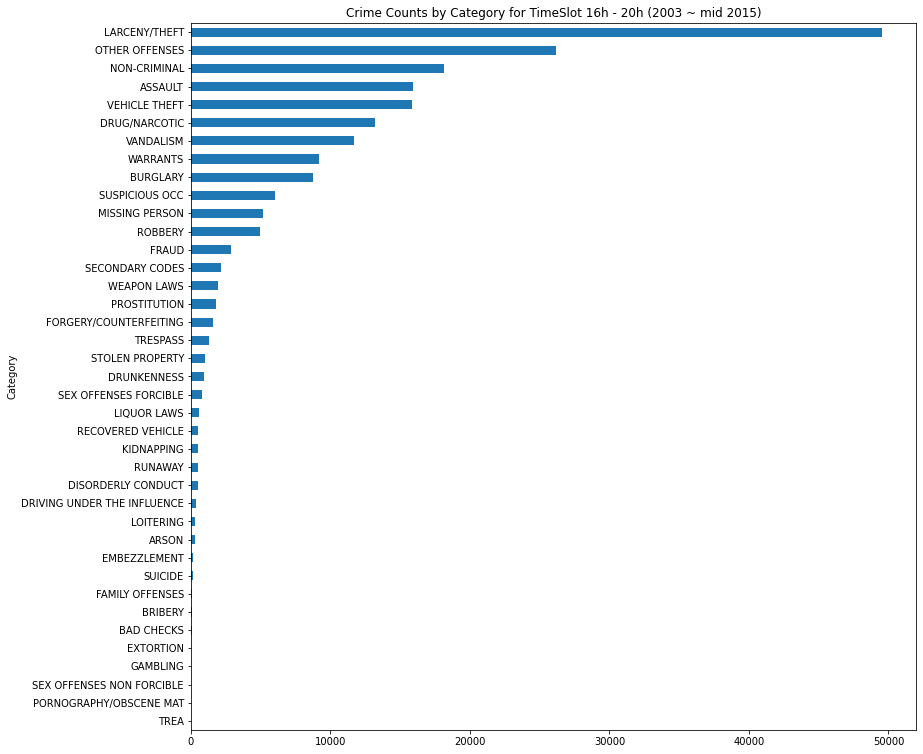

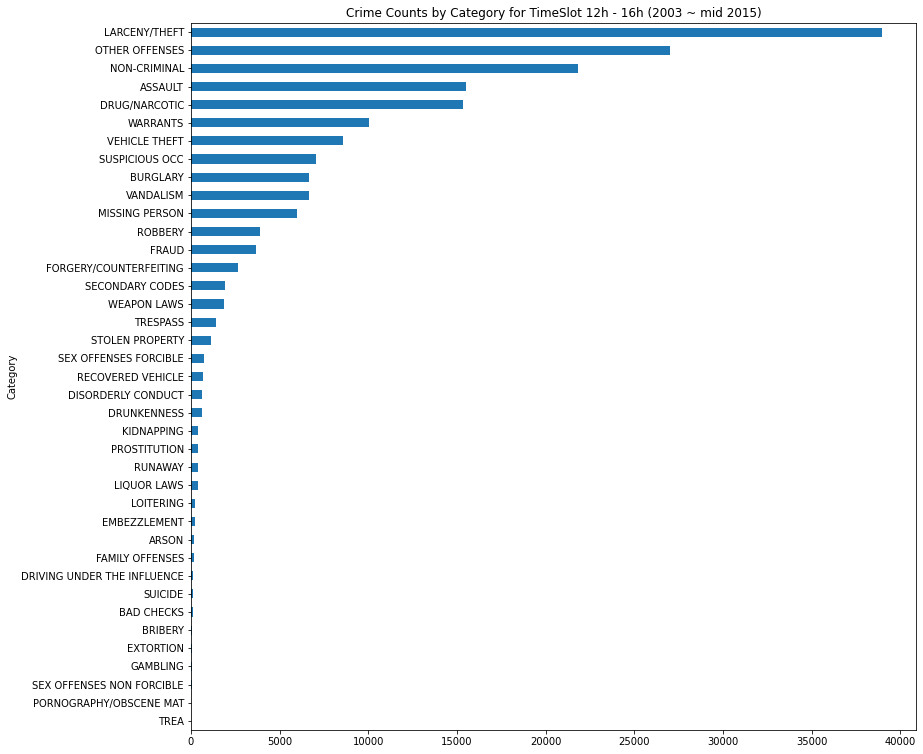

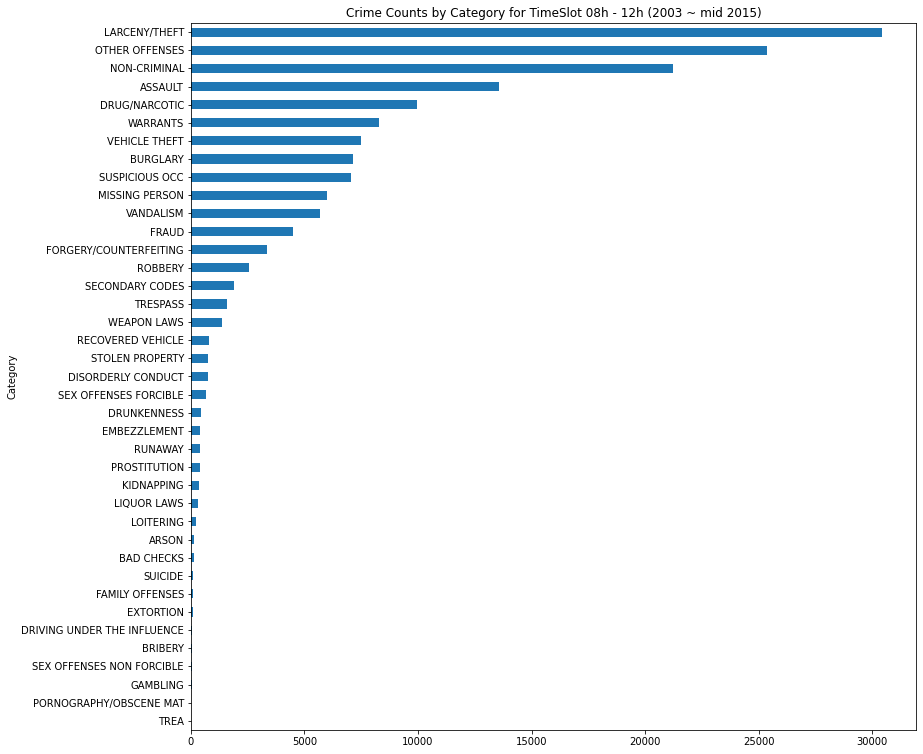

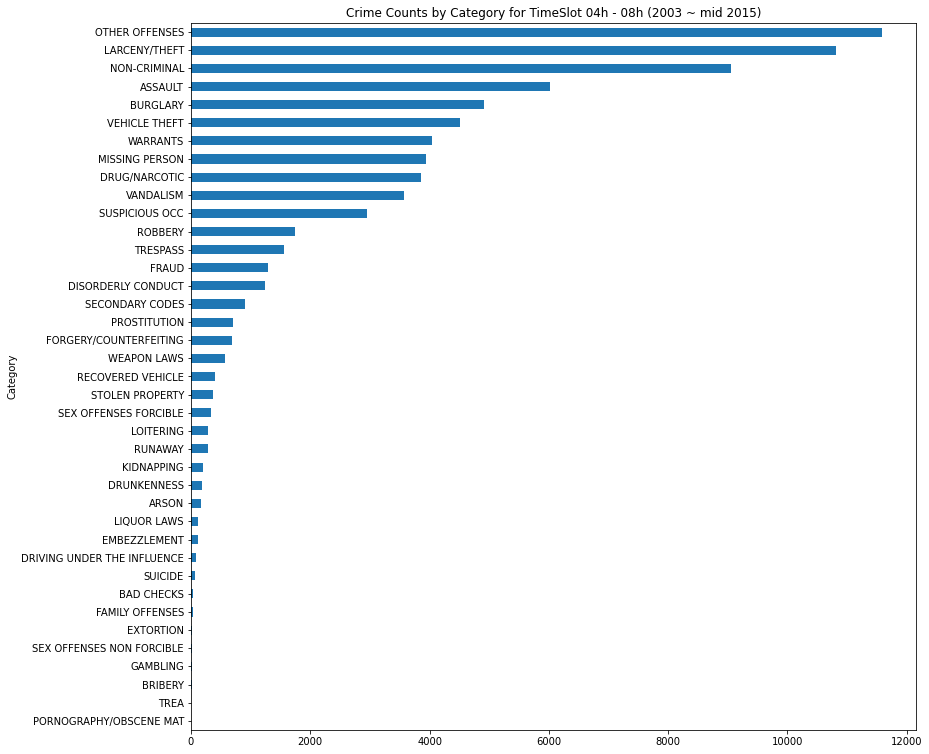

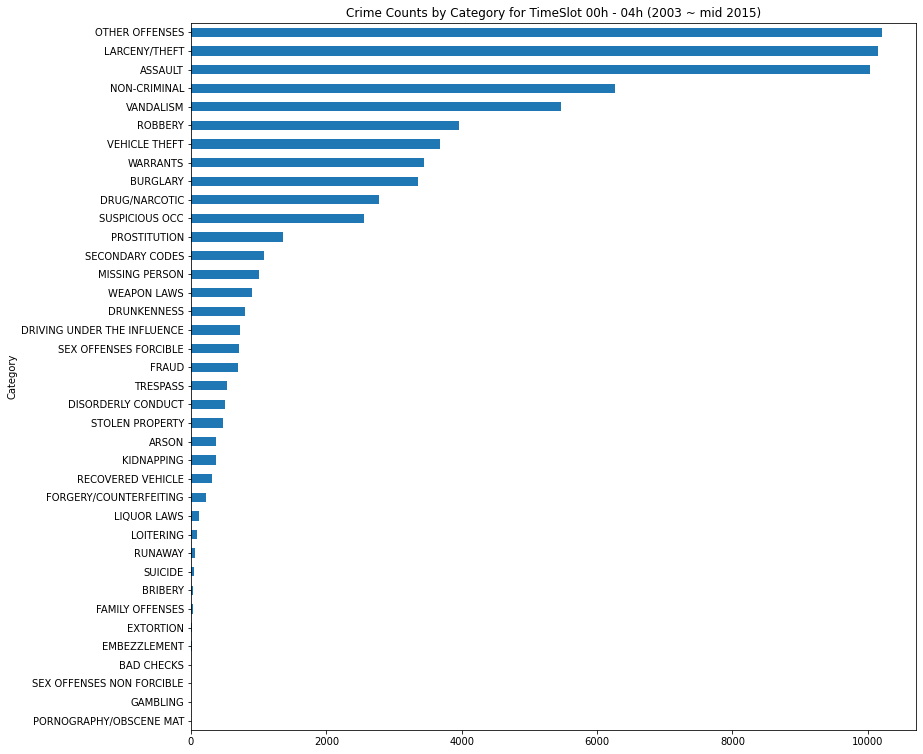

In [252]:
all_timeslots = train_df1.TimeSlot.unique()
for ts in all_timeslots:
    gb = train_df1[train_df1.TimeSlot == ts].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for TimeSlot {ts} (2003 ~ mid 2015)')
    plt.show()

#### We can focus on one particular category, for example Kidnapping/Robbery, and see when most of them occur

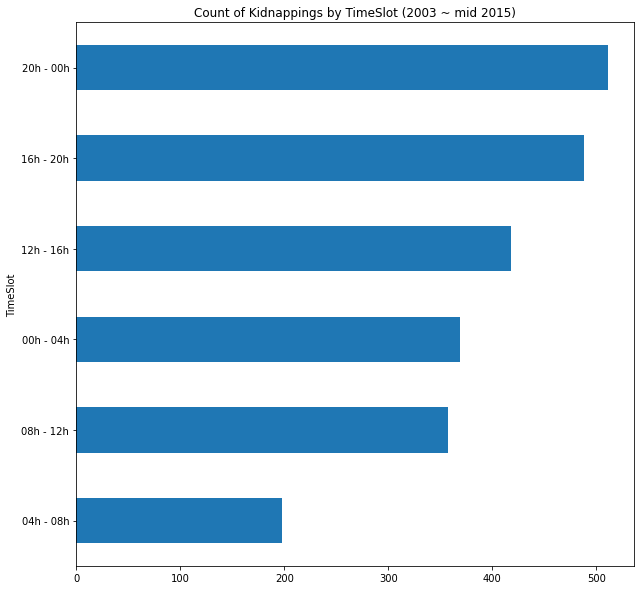

In [253]:
train_df1[train_df1.Category == 'KIDNAPPING'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Kidnappings by TimeSlot (2003 ~ mid 2015)')

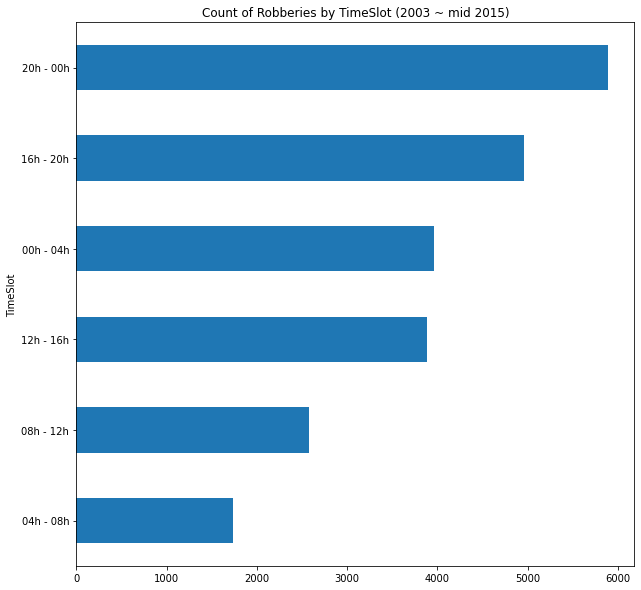

In [254]:
train_df1[train_df.Category == 'ROBBERY'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Robberies by TimeSlot (2003 ~ mid 2015)')

#### We can see that most of the Kidnappings and Robberies occur between 16h ~ 00h

### Dummy Encoding of the Category Column

In [255]:
train_df1 = pd.get_dummies(train_df1, columns=['Category'])
train_df1.columns

Index(['DateTime', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'Year', 'Month', 'Hour', 'MonthSin', 'MonthCos',
       'DayOfWeekInt', 'DayOfWeekSin', 'DayOfWeekCos', 'HourSin', 'HourCos',
       'TimeSlot', 'IsDay', 'Category_ARSON', 'Category_ASSAULT',
       'Category_BAD CHECKS', 'Category_BRIBERY', 'Category_BURGLARY',
       'Category_DISORDERLY CONDUCT', 'Category_DRIVING UNDER THE INFLUENCE',
       'Category_DRUG/NARCOTIC', 'Category_DRUNKENNESS',
       'Category_EMBEZZLEMENT', 'Category_EXTORTION',
       'Category_FAMILY OFFENSES', 'Category_FORGERY/COUNTERFEITING',
       'Category_FRAUD', 'Category_GAMBLING', 'Category_KIDNAPPING',
       'Category_LARCENY/THEFT', 'Category_LIQUOR LAWS', 'Category_LOITERING',
       'Category_MISSING PERSON', 'Category_NON-CRIMINAL',
       'Category_OTHER OFFENSES', 'Category_PORNOGRAPHY/OBSCENE MAT',
       'Category_PROSTITUTION', 'Category_RECOVERED VEHICLE',
       'Category_ROBBERY', 'Category_RU

In [256]:
# Although I didn't do any feature engineering now, I'll output a new file because I might come back and to do it
train_df1.to_csv('data/train_clean_2.csv', index=False)
print('Done Outputing')

Done Outputing


In [257]:
train_df2 = pd.read_csv('data/train_clean_2.csv')
train_df2.sample(3)

DateTime                         Descript DayOfWeek  \
516654  2008-02-04 14:40:00                   WARRANT ARREST    Monday   
768260  2004-06-22 01:25:00  ENROUTE TO OUTSIDE JURISDICTION   Tuesday   
409130  2009-08-18 10:57:00          POSSESSION OF MARIJUANA   Tuesday   

       PdDistrict      Resolution                   Address           X  \
516654       PARK  ARREST, BOOKED    600 Block of DUBOCE AV -122.434250   
768260  INGLESIDE   ARREST, CITED  CAMPBELL AV / RUTLAND ST -122.406190   
409130   SOUTHERN  ARREST, BOOKED        6TH ST / MARKET ST -122.410294   

                Y  Year  Month  ...  Category_SEX OFFENSES NON FORCIBLE  \
516654  37.769200  2008      2  ...                                   0   
768260  37.715245  2004      6  ...                                   0   
409130  37.782231  2009      8  ...                                   0   

        Category_STOLEN PROPERTY  Category_SUICIDE  Category_SUSPICIOUS OCC  \
516654                         0                 0                        0   
768260                         0                 0                        0   
409130                         0                 0                        0   

        Category_TREA  Category_TRESPASS  Category_VANDALISM  \
516654              0                  0                   0   
768260              0                  0                   0   
409130              0                  0                   0   

        Category_VEHICLE THEFT Category_WARRANTS  Category_WEAPON LAWS  
516654                       0                 1                     0  
768260                       0                 1                     0  
409130                       0                 0                     0  

[3 rows x 59 columns]

## The PdDistrict Column

#### Let's list all the PdDistricts:

In [258]:
import folium
from folium.plugins import HeatMap
all_districts = train_df2.PdDistrict.unique()
all_districts, len(all_districts)

(array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
        'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object),
 10)

#### We have 10 PdDistricts

### PdDistricts Map Visualization

#### To get the boundaries & coordinates of each PdDistrict, I refered to:
    - the GeoJson file from this link: https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf
    - this Image : https://s.hdnux.com/photos/46/44/02/10109103/27/940x940.jpg
    
**Notice**: I didn't find a way to permanently show the names of the PdDistricts in the Folium Map, so I just made normal Folium Markers with tooltips showing the name of the PdDistrict when the mouse hovers over them

In [259]:
districts_coordinates = {}
districts_coordinates['MISSION'] = [37.755, -122.42]
districts_coordinates['NORTHERN'] = [37.787, -122.433]
districts_coordinates['PARK'] = [37.76, -122.45]
districts_coordinates['INGLESIDE'] = [37.727, -122.435]
districts_coordinates['RICHMOND'] = [37.775, -122.48]
districts_coordinates['CENTRAL'] = [37.795, -122.41]
districts_coordinates['TARAVAL'] = [37.736, -122.48]
districts_coordinates['TENDERLOIN'] = [37.78, -122.414]
districts_coordinates['SOUTHERN'] = [37.772, -122.4]
districts_coordinates['BAYVIEW'] = [37.732, -122.39]

In [260]:
city_coordinates=[37.77397, -122.4312]
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
#folium.Marker([37.732, -122.39], tooltip='MISSION').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
m

#### Next, Let's list the PdDistricts where most crimes occur

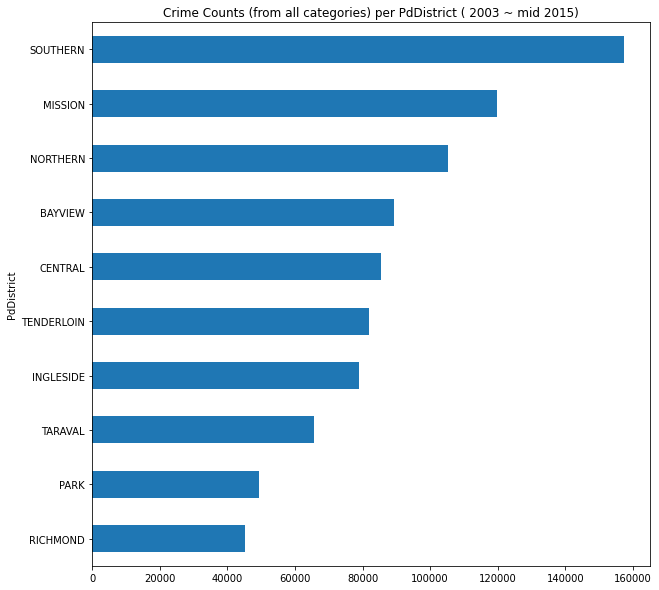

In [261]:
gb = train_df2.groupby('PdDistrict')['Descript'].count().sort_values()
gb.plot(kind='barh', figsize=(10,10), title='Crime Counts (from all categories) per PdDistrict ( 2003 ~ mid 2015)')

In [263]:
train_df2

DateTime                                   Descript  \
0       2015-05-13 23:53:00                             WARRANT ARREST   
1       2015-05-13 23:53:00                   TRAFFIC VIOLATION ARREST   
2       2015-05-13 23:33:00                   TRAFFIC VIOLATION ARREST   
3       2015-05-13 23:30:00               GRAND THEFT FROM LOCKED AUTO   
4       2015-05-13 23:30:00               GRAND THEFT FROM LOCKED AUTO   
...                     ...                                        ...   
878044  2003-01-06 00:15:00           ROBBERY ON THE STREET WITH A GUN   
878045  2003-01-06 00:01:00               GRAND THEFT FROM LOCKED AUTO   
878046  2003-01-06 00:01:00               GRAND THEFT FROM LOCKED AUTO   
878047  2003-01-06 00:01:00  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
878048  2003-01-06 00:01:00                   CHECKS, FORGERY (FELONY)   

        DayOfWeek PdDistrict      Resolution                     Address  \
0       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
1       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
2       Wednesday   NORTHERN  ARREST, BOOKED   VANNESS AV / GREENWICH ST   
3       Wednesday   NORTHERN            NONE    1500 Block of LOMBARD ST   
4       Wednesday       PARK            NONE   100 Block of BRODERICK ST   
...           ...        ...             ...                         ...   
878044     Monday    TARAVAL            NONE  FARALLONES ST / CAPITOL AV   
878045     Monday  INGLESIDE            NONE        600 Block of EDNA ST   
878046     Monday   SOUTHERN            NONE          5TH ST / FOLSOM ST   
878047     Monday   SOUTHERN            NONE        TOWNSEND ST / 2ND ST   
878048     Monday    BAYVIEW            NONE    1800 Block of NEWCOMB AV   

                 X          Y  Year  Month  ...  \
0      -122.425892  37.774599  2015      5  ...   
1      -122.425892  37.774599  2015      5  ...   
2      -122.424363  37.800414  2015      5  ...   
3      -122.426995  37.800873  2015      5  ...   
4      -122.438738  37.771541  2015      5  ...   
...            ...        ...   ...    ...  ...   
878044 -122.459033  37.714056  2003      1  ...   
878045 -122.447364  37.731948  2003      1  ...   
878046 -122.403390  37.780266  2003      1  ...   
878047 -122.390531  37.780607  2003      1  ...   
878048 -122.394926  37.738212  2003      1  ...   

        Category_SEX OFFENSES NON FORCIBLE  Category_STOLEN PROPERTY  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   
3                                        0                         0   
4                                        0                         0   
...                                    ...                       ...   
878044                                   0                         0   
878045                                   0                         0   
878046                                   0                         0   
878047                                   0                         0   
878048                                   0                         0   

        Category_SUICIDE  Category_SUSPICIOUS OCC  Category_TREA  \
0                      0                        0              0   
1                      0                        0              0   
2                      0                        0              0   
3                      0                        0              0   
4                      0                        0              0   
...                  ...                      ...            ...   
878044                 0                        0              0   
878045                 0                        0              0   
878046                 0                        0              0   
878047                 0                        0          

#### Let's now list the crime counts per category for each district in the last year 2014( to see what types of crimes occur most in each district)

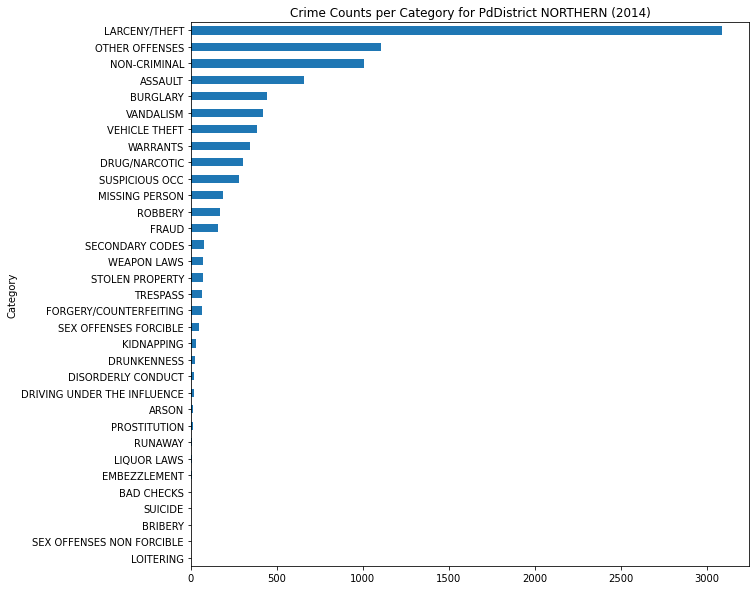

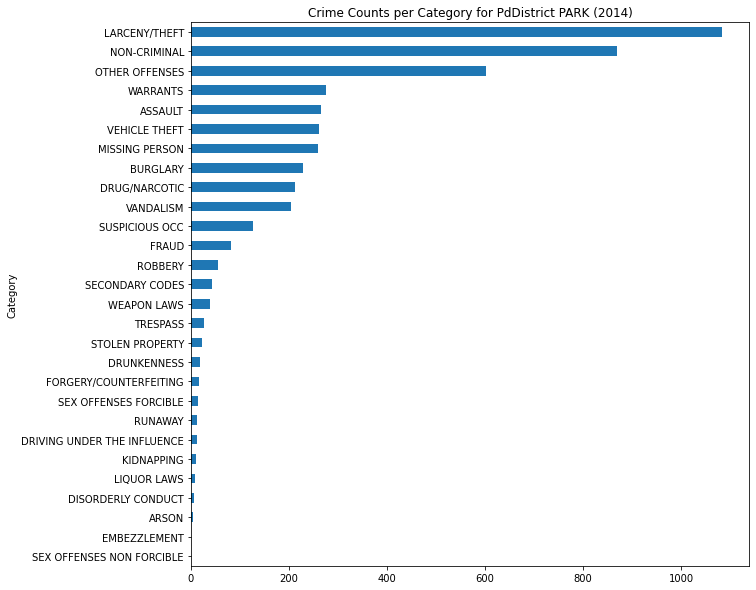

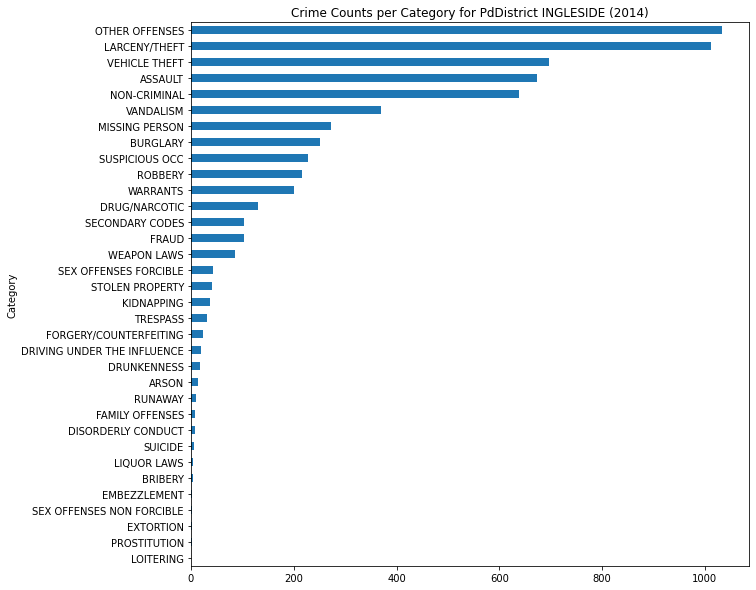

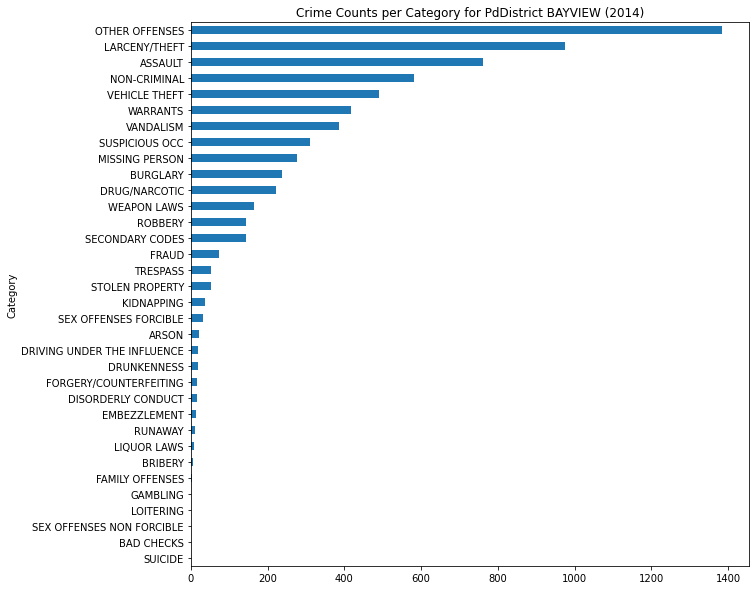

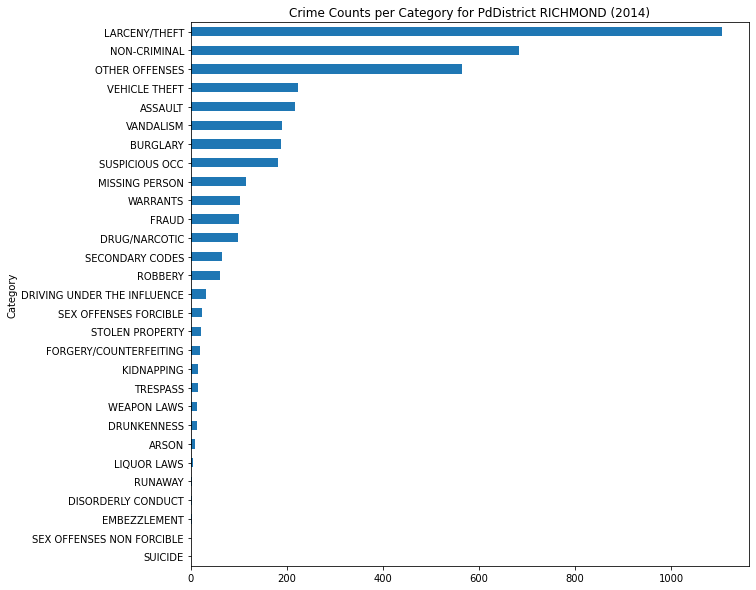

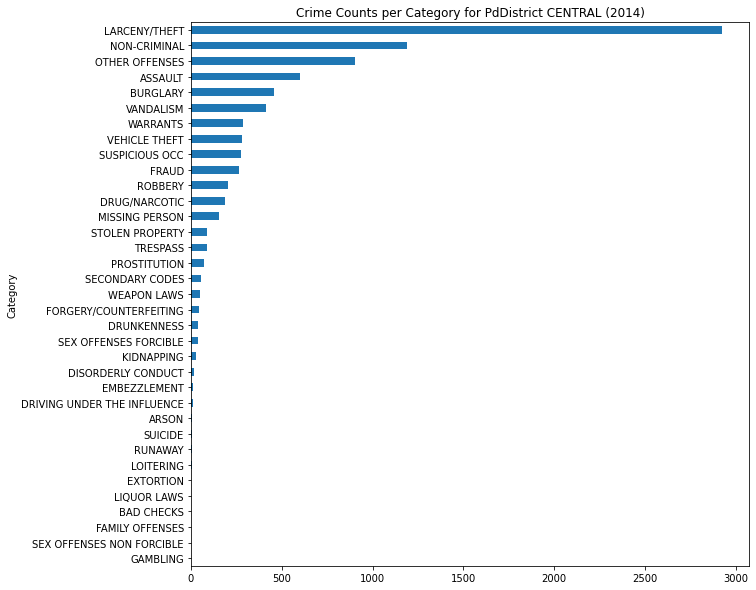

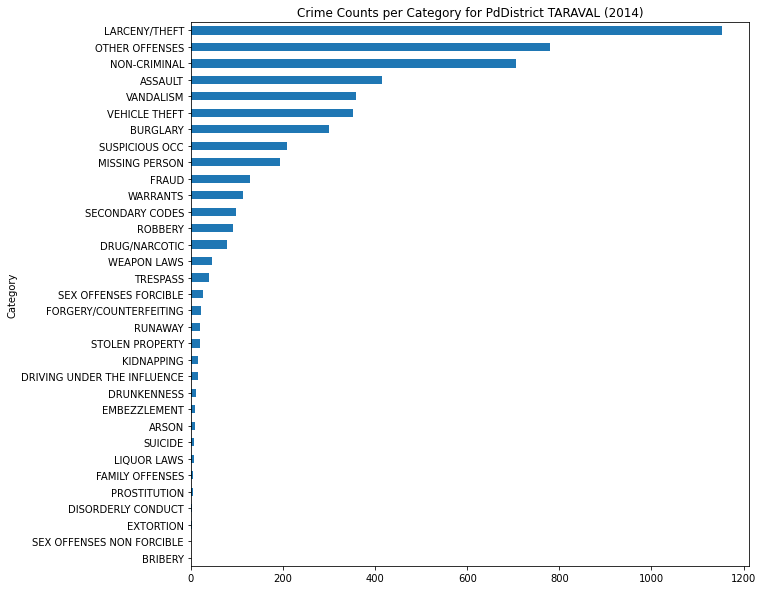

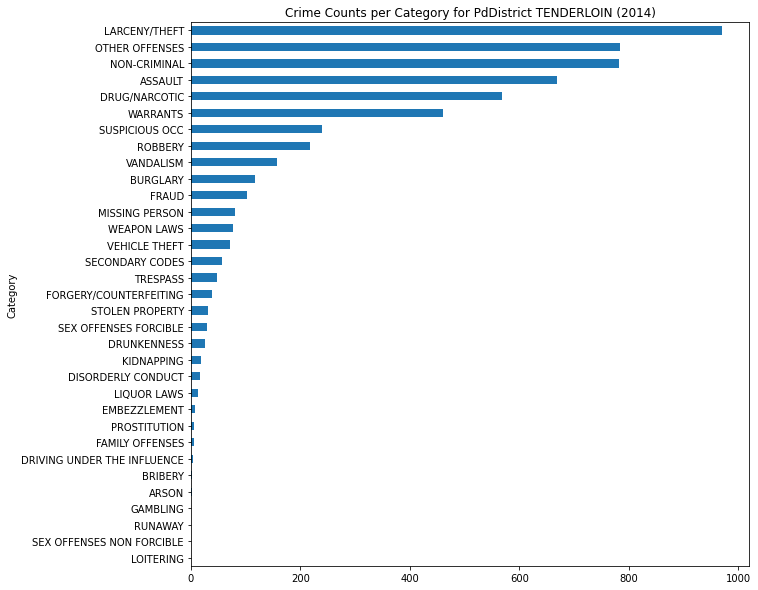

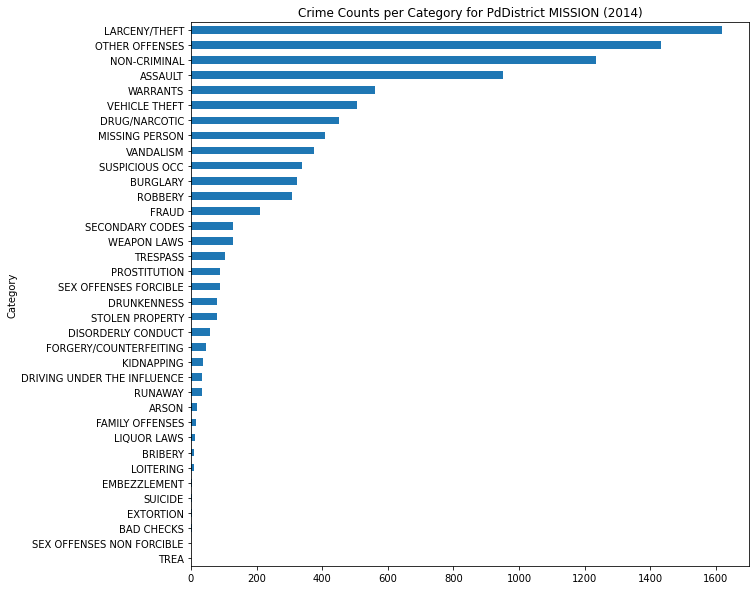

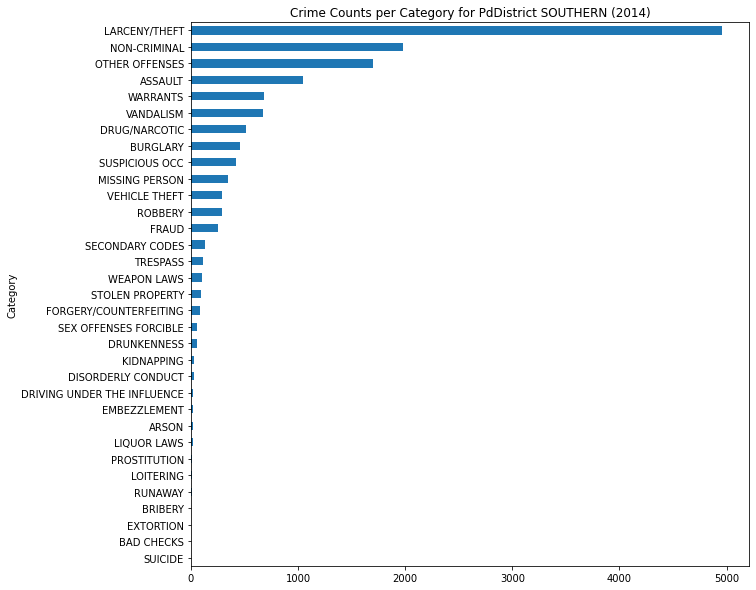

In [264]:
y = 2014
for pd in all_districts:
    gb = train_df[ (train_df.Year == y) & (train_df.PdDistrict == pd) ].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts per Category for PdDistrict {pd} ({y})')
    plt.show()

#### It is clear that crimes from category 'LARCENY/THEFT' are always on the Top Two in all PdDistricts

#### Another way to better visualize it, is to plot the crime counts of each category per PdDistrict

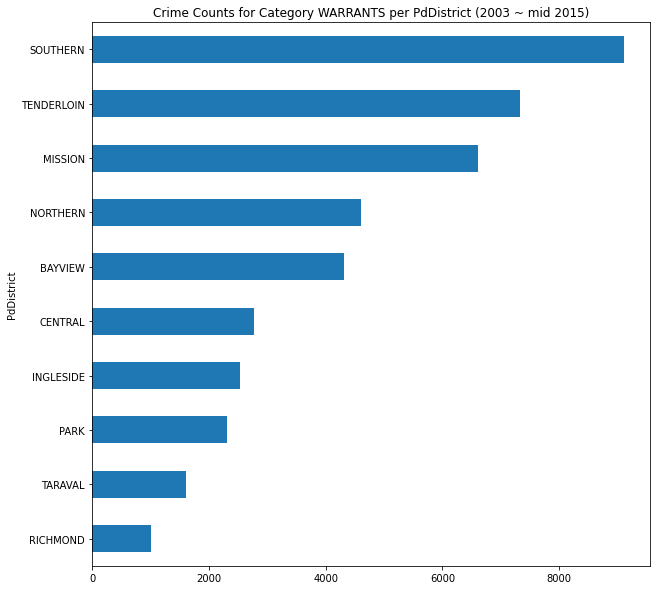

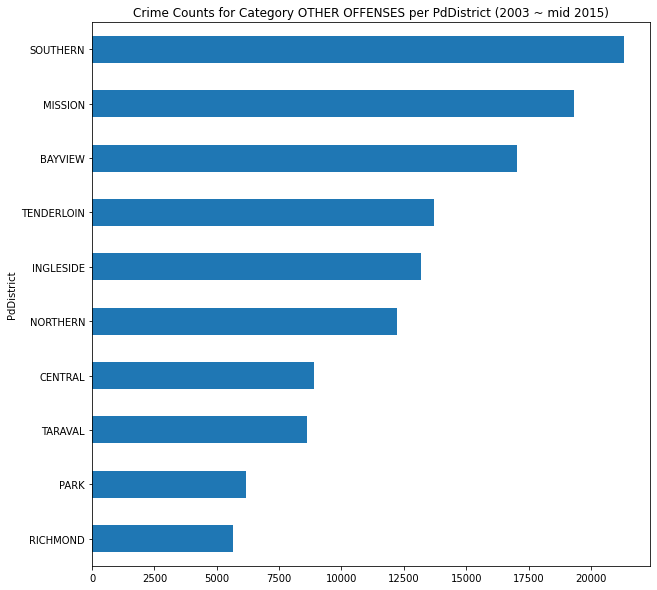

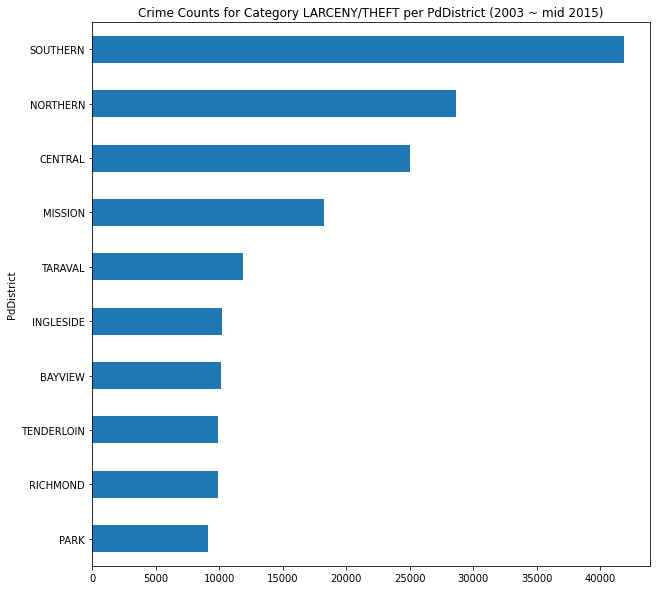

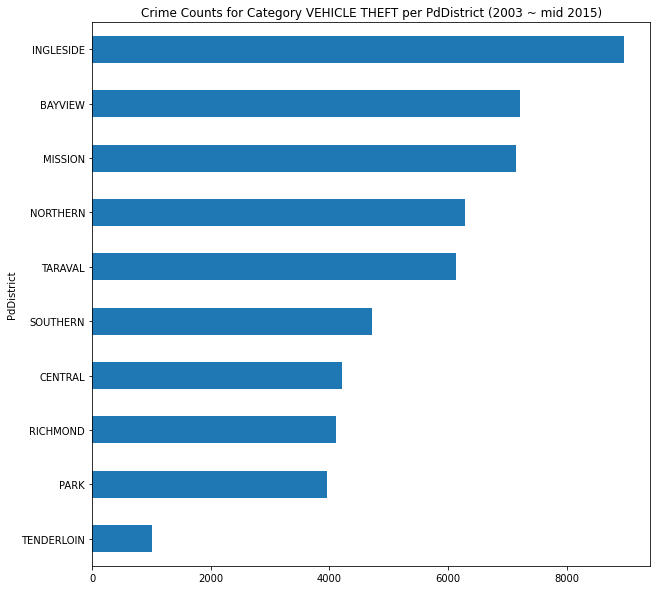

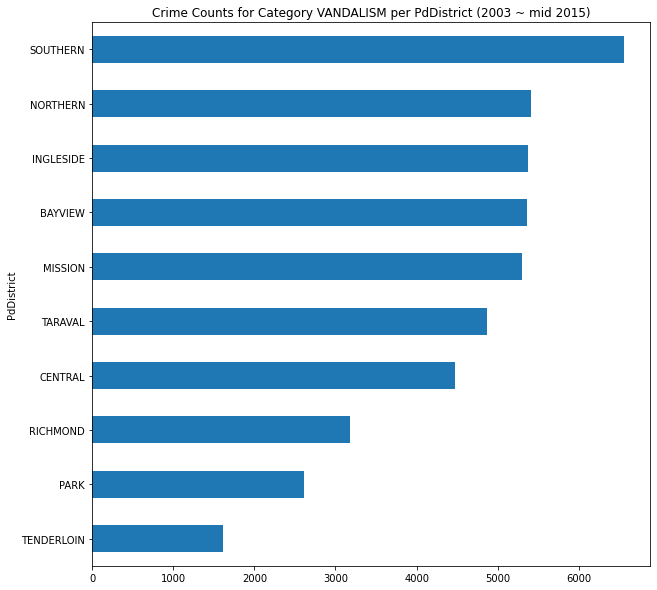

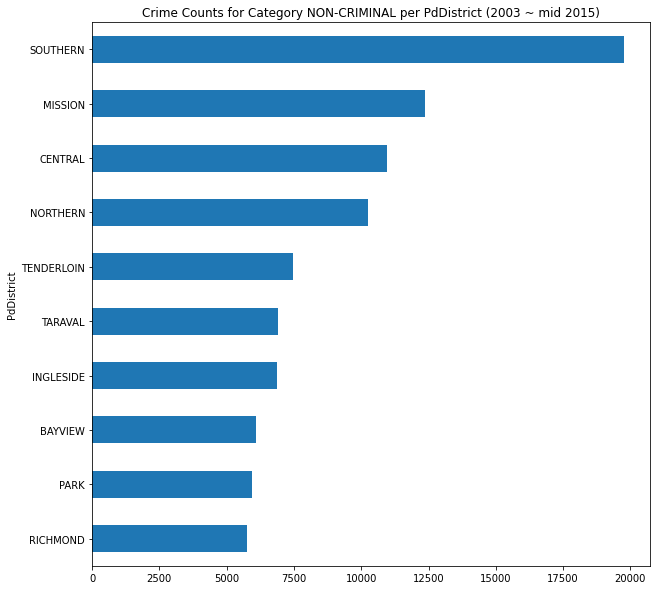

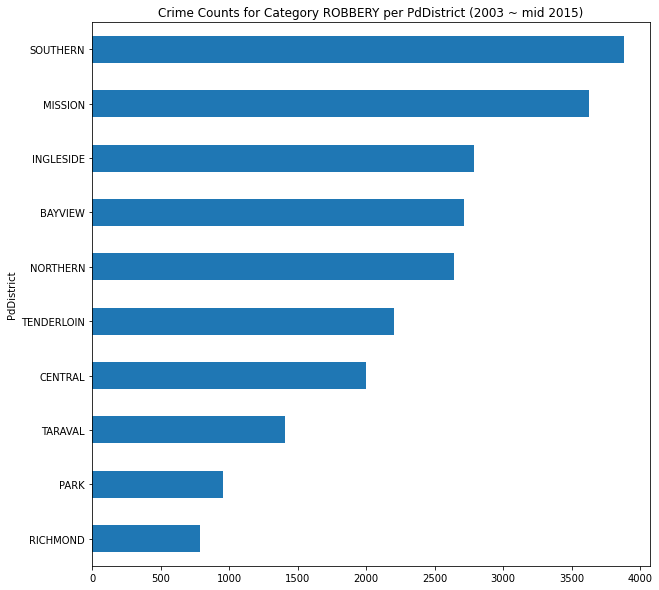

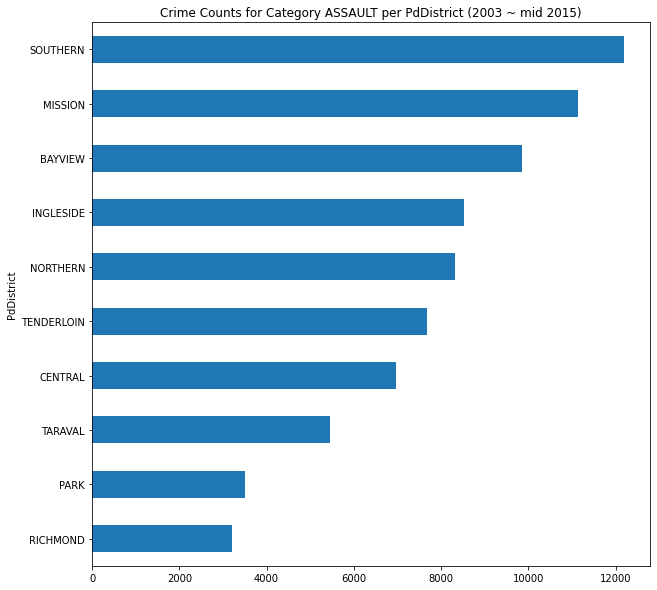

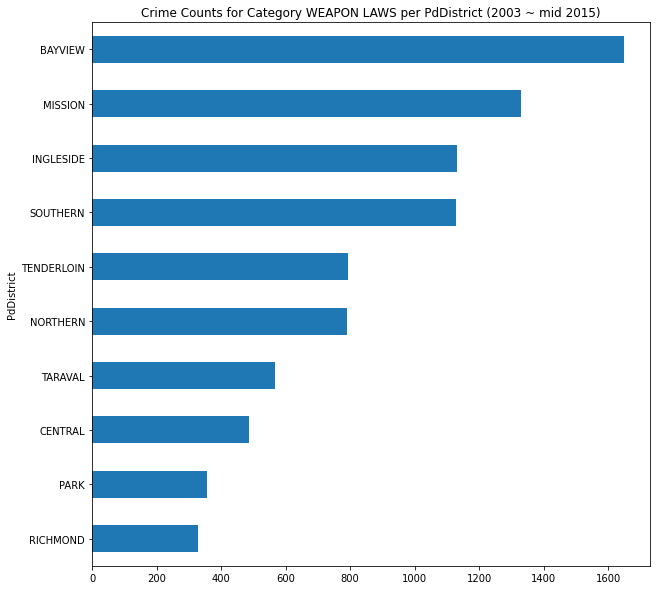

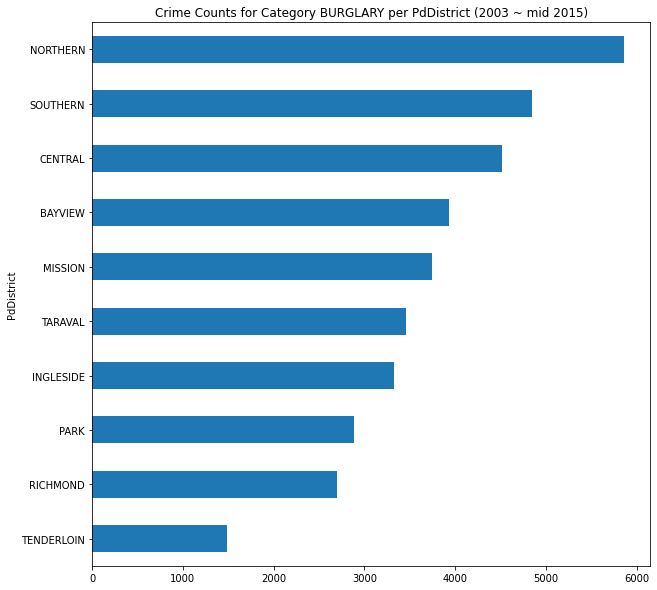

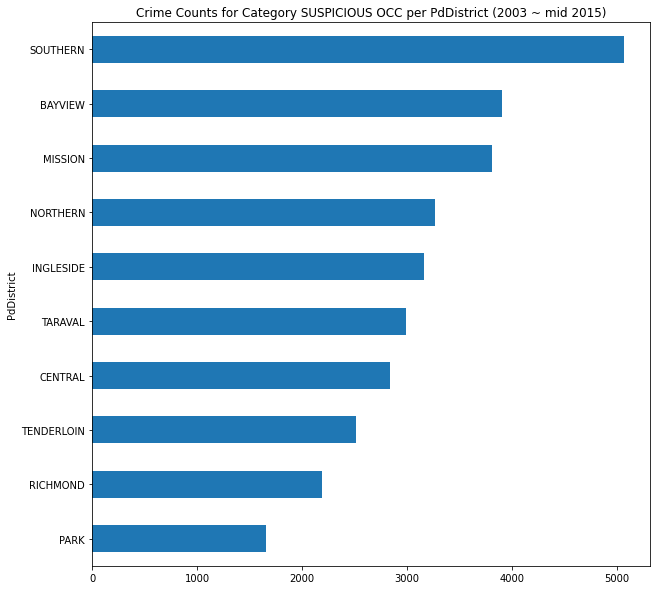

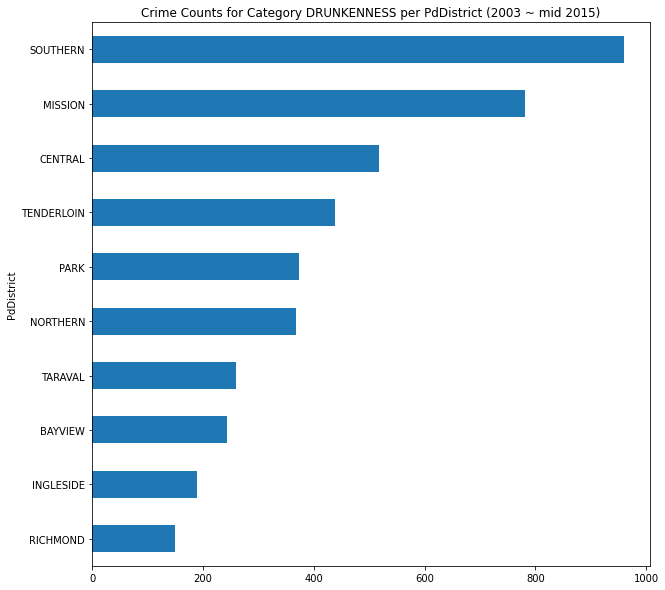

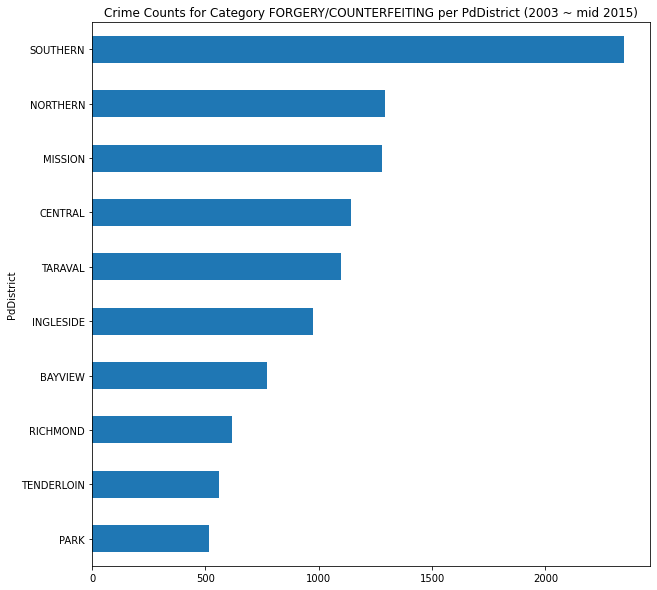

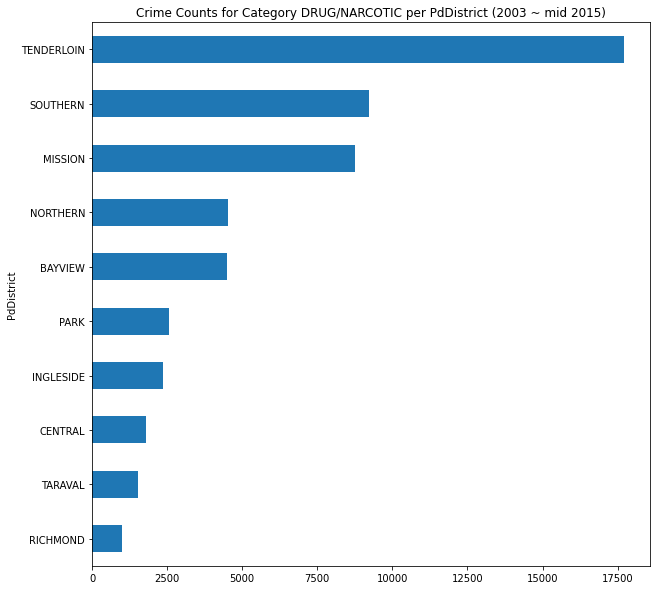

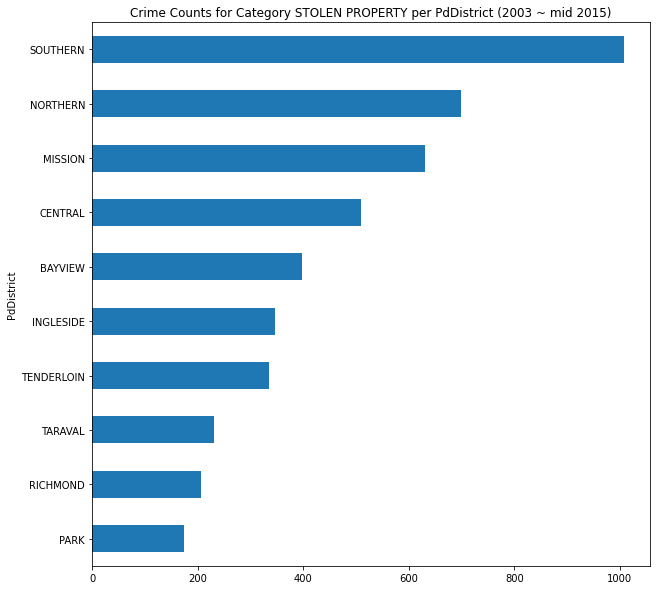

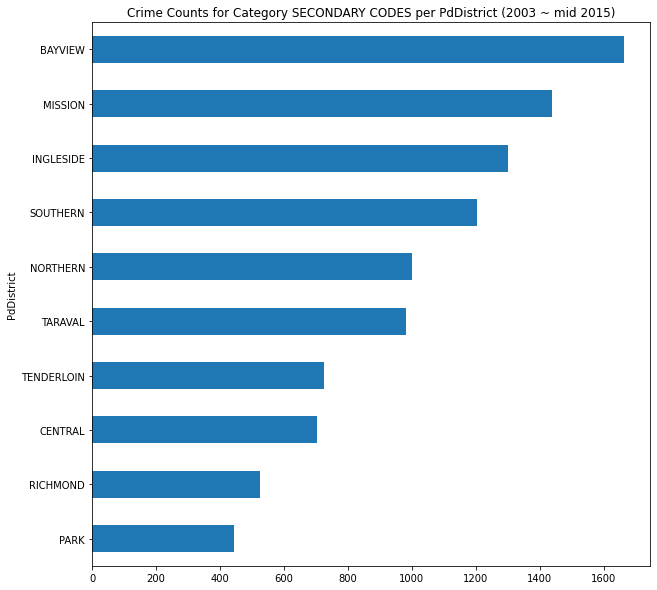

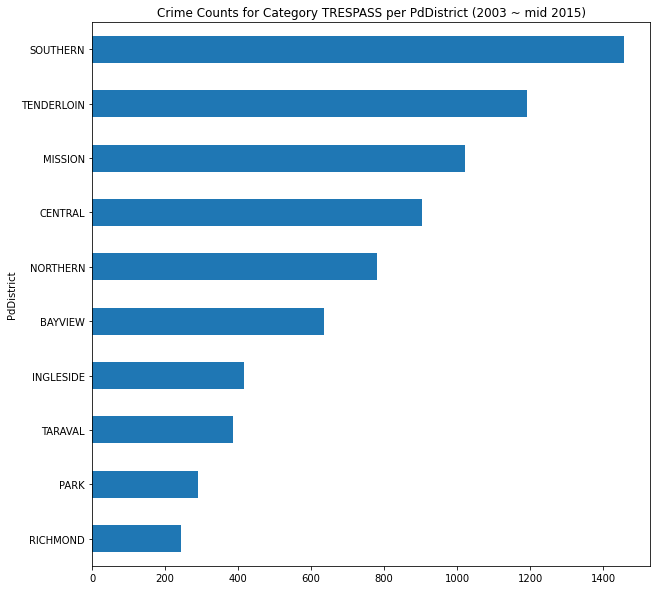

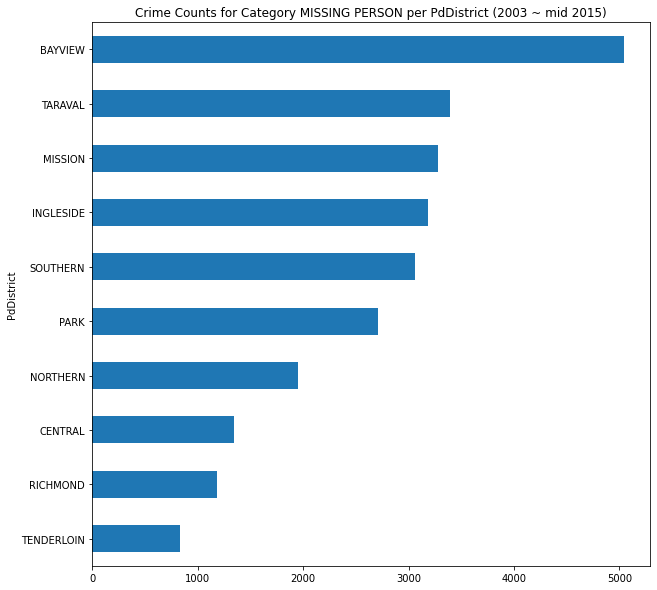

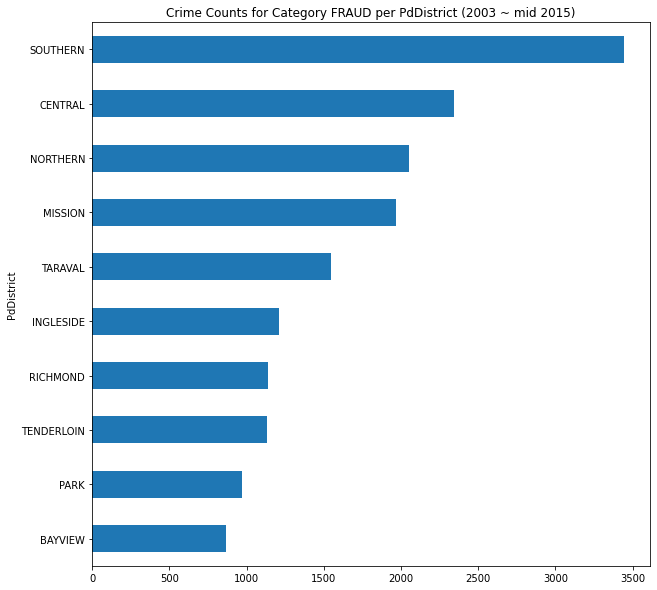

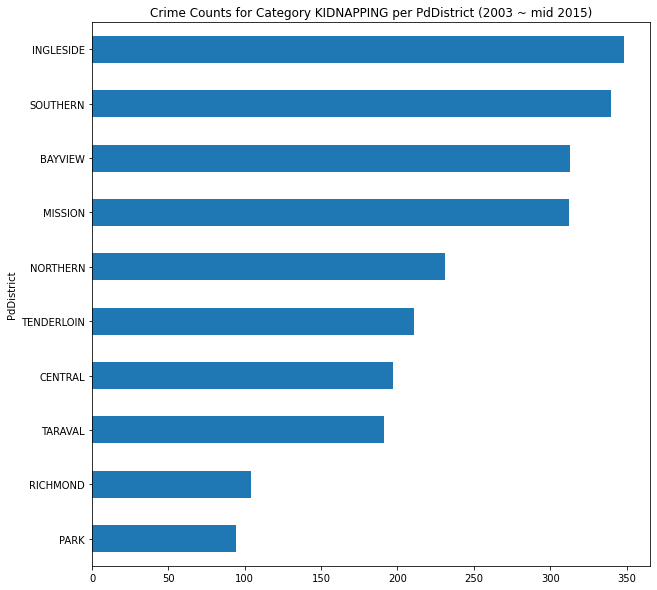

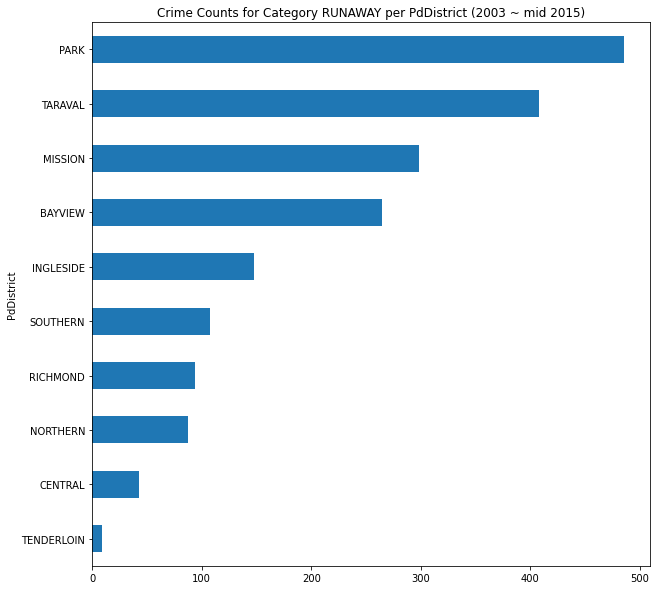

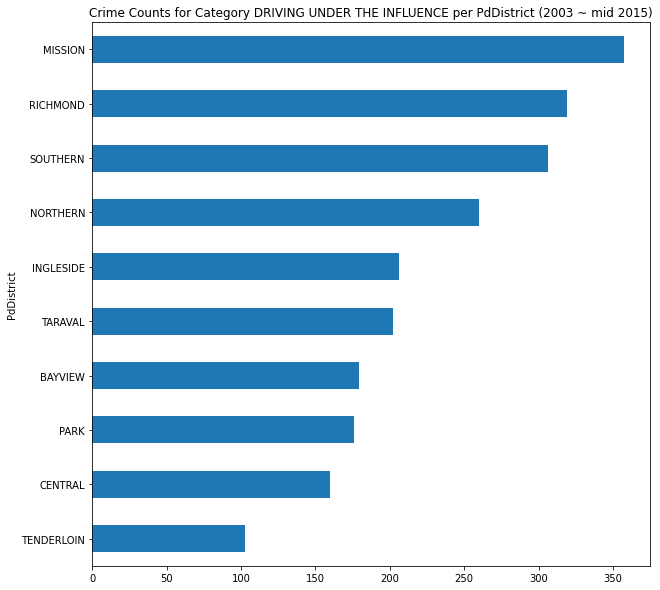

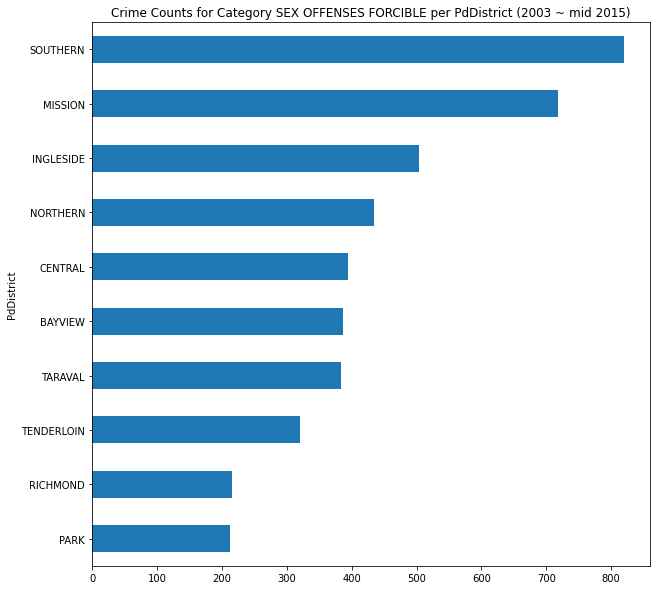

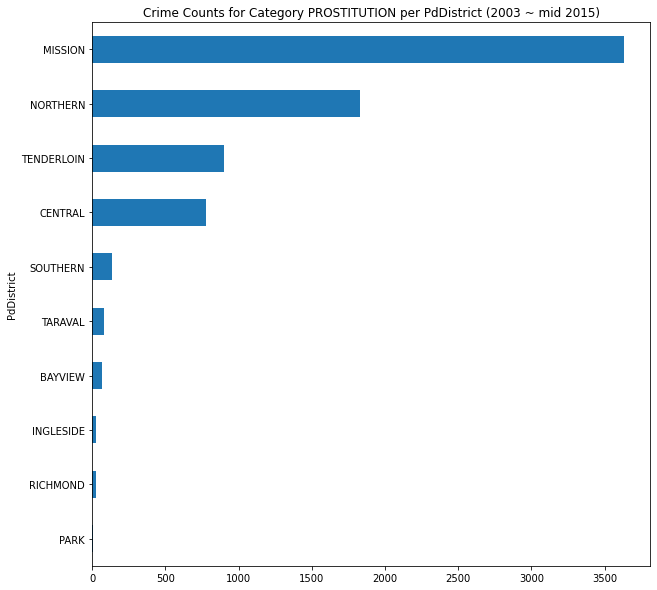

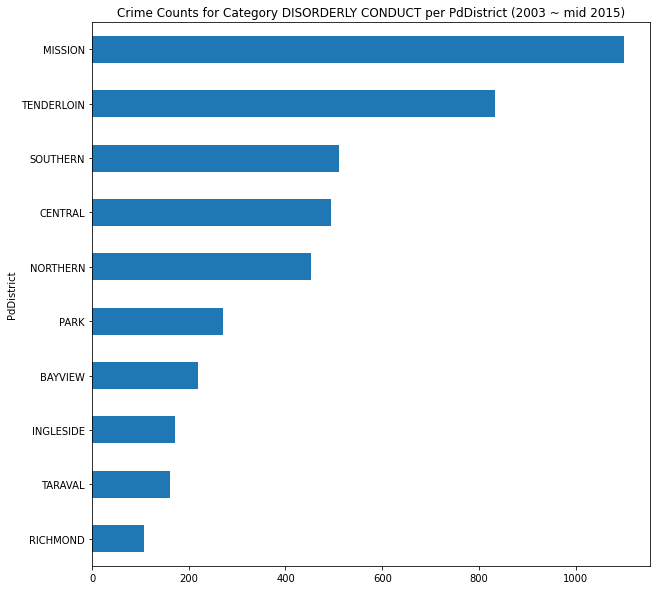

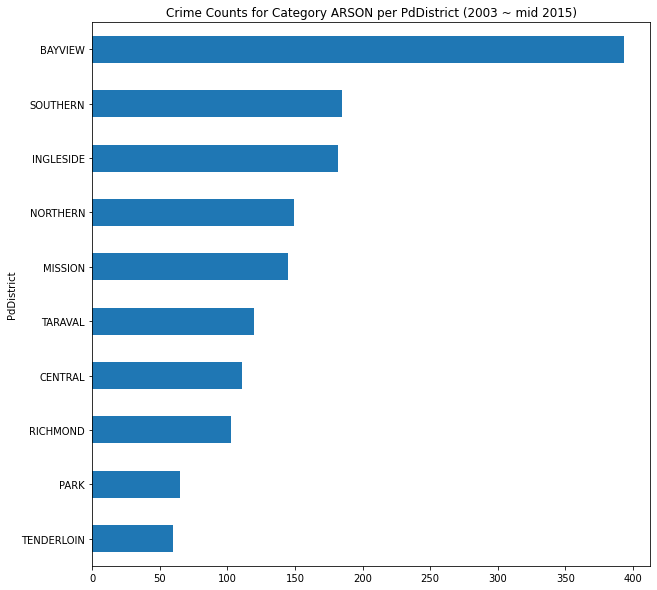

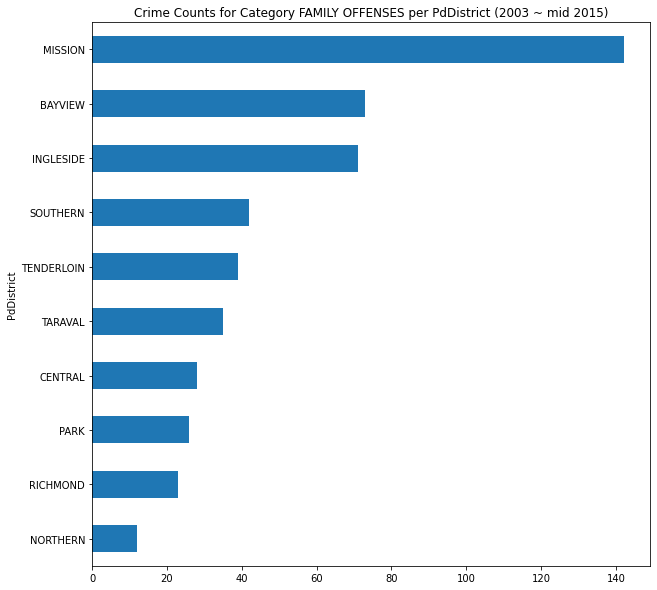

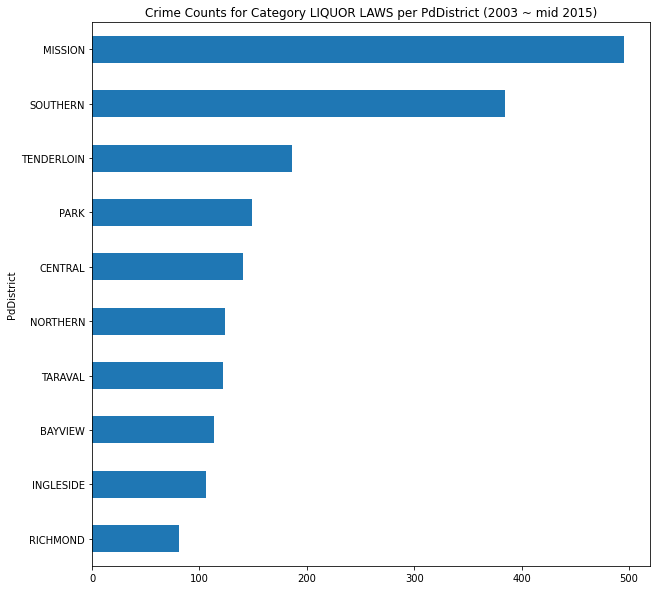

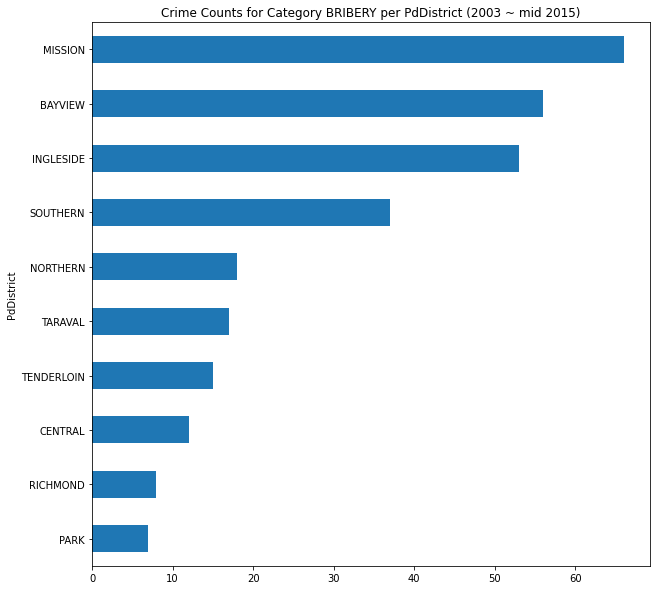

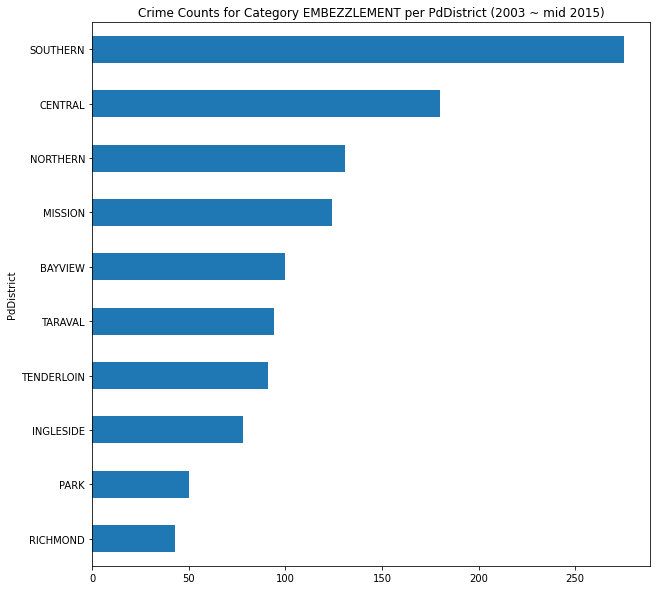

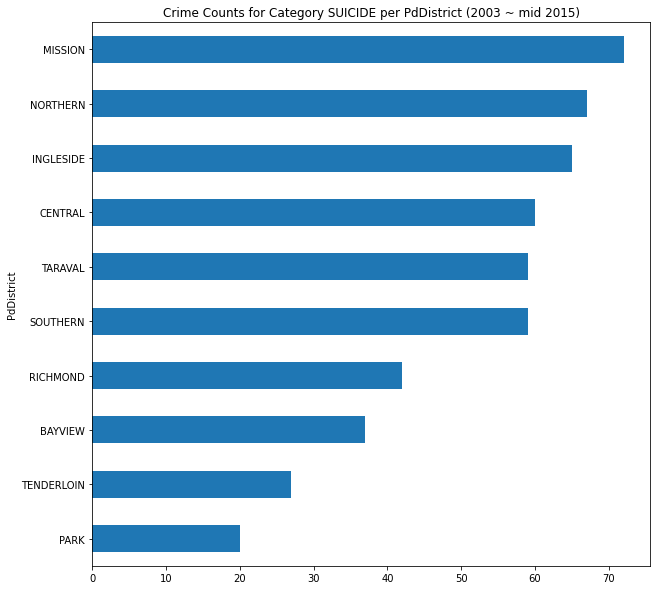

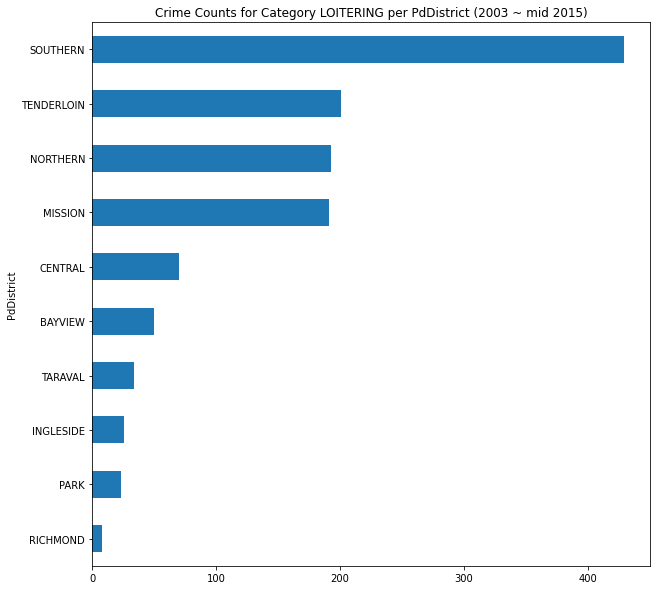

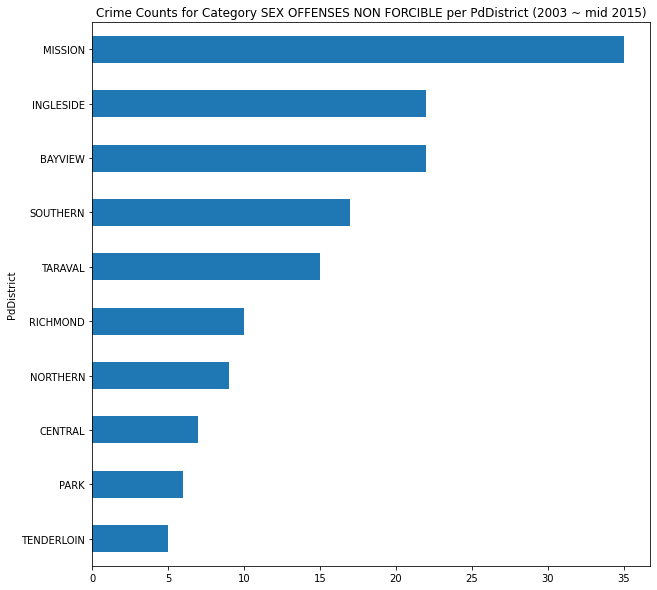

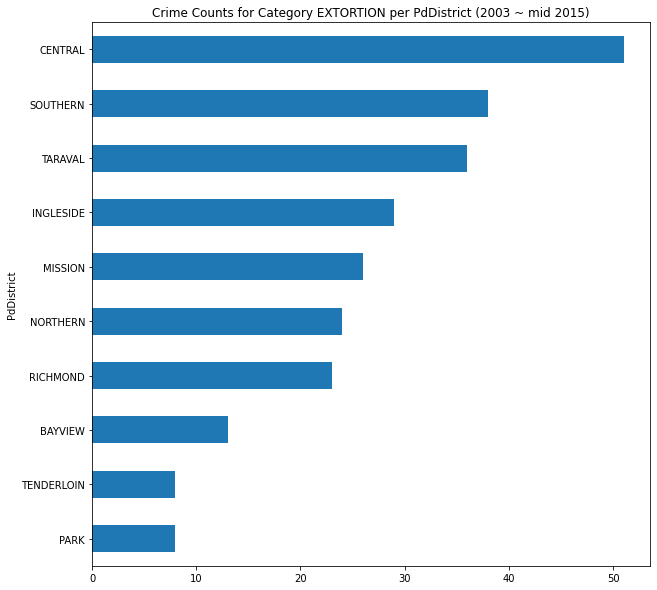

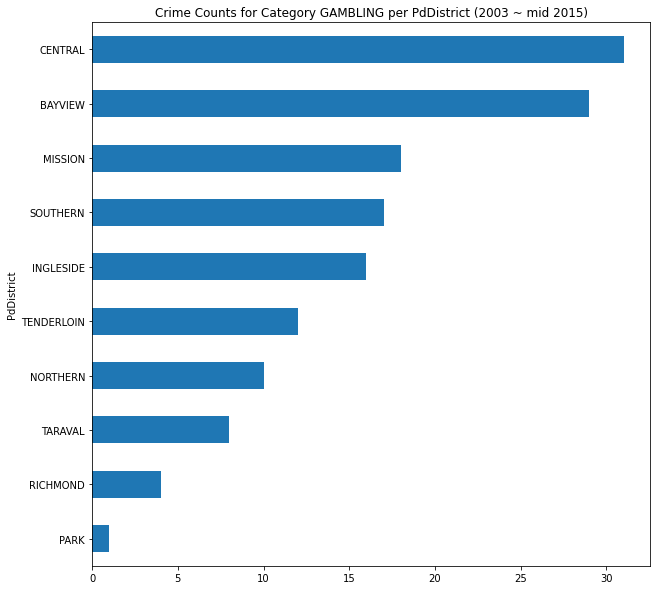

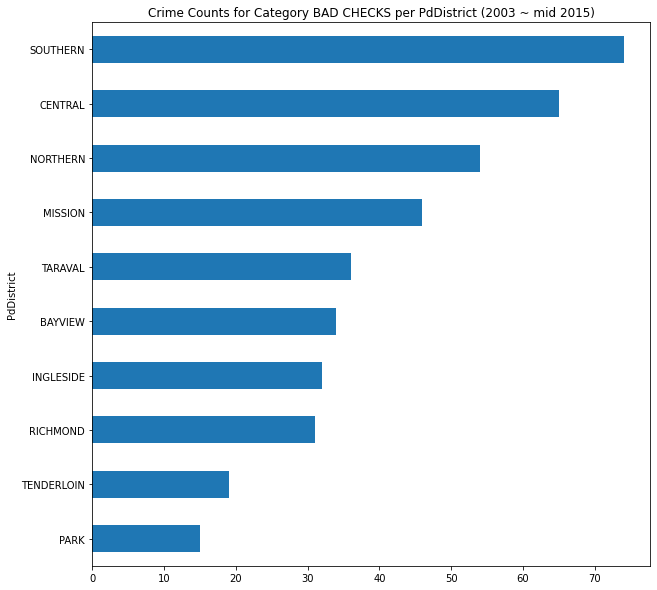

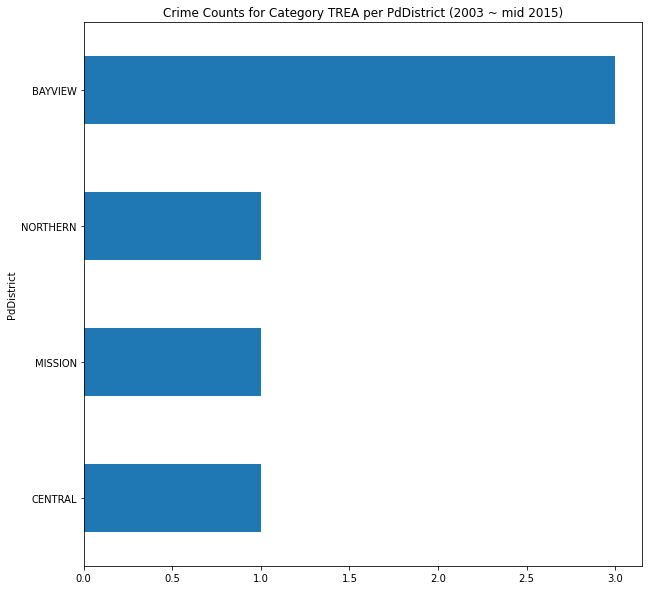

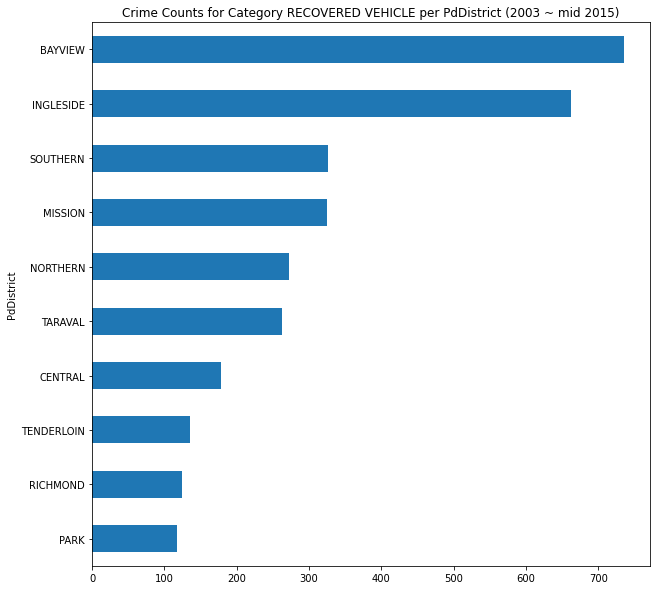

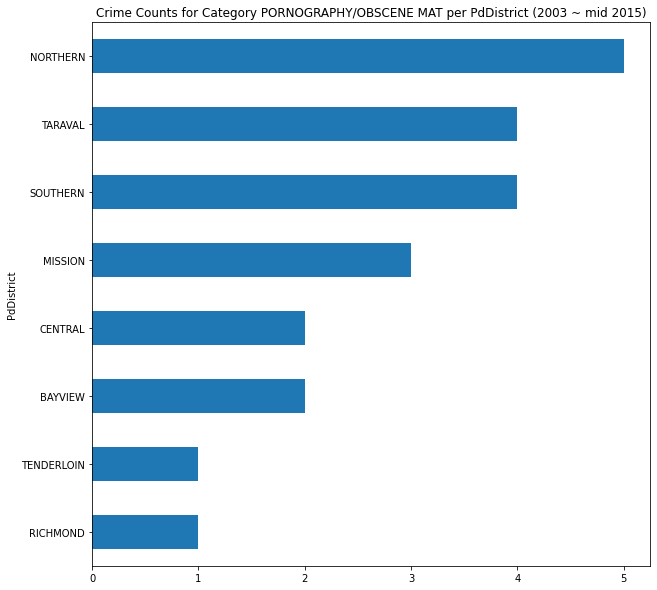

In [265]:
all_cats = train_df.Category.unique()
for c in all_cats:
    gb = train_df[train_df.Category == c].groupby('PdDistrict')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts for Category {c} per PdDistrict (2003 ~ mid 2015)')
    plt.show()

### Heat Map Visualizations of Thefts/Robberies/Burglaries/Kidnappings

#### From here, we can do endless visualizations, let's concentrate on few categories from last year 2014:
    - Theft/Larceny
    - Robbery
    - Burglary
    - Kidnapping


In [276]:
thefts = train_df[ (train_df.Year == 2014) & (train_df.Category == 'LARCENY/THEFT')][['Y','X']]
robberies = train_df[ (train_df.Year == 2014) & (train_df.Category == 'ROBBERY')][['Y','X']]
burglaries = train_df[ (train_df.Year == 2014) & (train_df.Category == 'BURGLARY')][['Y','X']]
kidnappings = train_df[ (train_df.Year == 2014) & (train_df.Category == 'KIDNAPPING')][['Y','X']]

#### Thefts

- From the Map below, we can see that Thefts occur a lot in the north-eastern part of the city ( CENTRAL, NORTHERN, SOUTHERN, TENDERLOIN )

In [284]:
m1 = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(thefts[['Y','X']].to_numpy()).add_to(m)

m1

#### Robberies

In [282]:
m2 = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(robberies[['Y','X']].to_numpy()).add_to(m)

m2

#### Burglaries

In [274]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(burglaries[['Y','X']].to_numpy()).add_to(m)

m

#### Kidnappings

In [275]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(kidnappings[['Y','X']].to_numpy()).add_to(m)

m

### For more practise check out : https://www.youtube.com/watch?v=xvqsFTUsOmc&t=5560s

### Github Code For Reference : https://github.com/adashofdata/nlp-in-python-tutorial